# Capstone Project Modul 2 - New York City TLC Data Analysis
Faishal Hananta Aji JCDSBSDAM-31

# **1. Latar Belakang**


New York City Taxi & Limousine Commission merupakan sebuah perusahaan yang mengatur industri antar-jemput mobil (dari taksi kota dan limousine hingga layanan antar-jemput berbasis app seperti Uber dan Lyft) yang beroperasi di kota New York dari segi lisensi hingga regulasi kegiatan sehari-hari.

## **1.1. Pernyataan Masalah**


Perusahaan New York City TLC ingin mengetahui bagaimana kegiatan sehari-hari armada TLC dapat dioptimalkan untuk memaksimalisasi efisiensi kerja armada serta profit yang didapatkan oleh perusahaan. 

Sebagai sebuah data analyst, kita mencoba untuk menjawab pertanyaan berikut:

Bagaimana mengoptimalkan struktur tarif, jarak, dan waktu tempuh untuk meningkatkan efisiensi dan profitabilitas layanan taksi?

# **2. Data**


Untuk menjawab pertanyaan di atas, kita dapat menganalisis data catatan pemesanan yang dipegang oleh New York City TLC. Data yang digunakan merupakan data New York City TLC selama bulan Januari pada tahun 2023.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Dataset yang digunakan dalam analysis ini merupakan data informasi yang tercatat dari tiap perjalanan yang dilakukan oleh jasa layanan antar-jemput taksi, limusin dan mobil yang dikelola oleh New York City TLC. Menurut data dictionary yang telah diberikan oleh pihak New York City TLC, terdapat 18 jenis data yang disimpan oleh dataset ini, yaitu:

- VendorID: 
    - Provider LPEP (Street Hail Livery Technology System) yang memberikan data tersebut ke New York TLC
- lpep_pickup_datetime: 
    - Waktu dan tanggal taksimeter taksi/limusin/mobil dinyalakan ketika perjalanan dimulai dalam sebuah perjalanan antar-jemput
- lpep_dropoff_datetime
    - Waktu dan tanggal taksimeter taksi/limusin/mobil dimatikan ketika perjalanan selesai dalam sebuah perjalanan antar-jemput
- Passenger_count
    - Jumlah penumpang yang diangkut taksi/limusin/mobil dalam sebuah perjalanan antar-jemput (diisi oleh driver)
- Trip_distance
    - Panjang perjalanan dalam sebuah perjalanan antar-jemput, sebagaimana tercatat pada taksimeter
- PULocationID
    - ID yang menggambarkan lokasi perjalanan antar-jemput dimulai
- DOLocationID
    - ID yang menggambarkan lokasi perjalanan antar-jemput selesai
- RateCodeID
    - ID yang menggambarkan tipe tarif (fare) yang menentukan harga akhir yang perlu dibayar setelah akhir perjalanan antar-jemput
- Store_and_fwd_flag
    - Label yang menggambarkan apakah data perjalanan dari sebuah perjalanan antar-jemput disimpan terlebih dahulu di taksi/limusin/mobil sebelum dikirimkan ke vendor karena terjadi masalah koneksi di tengah perjalanan
- Payment_type
    - ID yang menggambarkan metode pembayaran yang digunakan oleh penumpang 
- Fare_amount
    - Jumlah tarif taksi/limosin/mobil yang ditentukan dari panjang perjalanan yang terlihat pada taksimeter
- MTA_tax
    - Pajak MTA yang ditentukan oleh rate
- Improvement_surcharge
    - Biaya tambahan yang dipungut demi perawatan dan pengembangan layanan antar-jemput New York TLC 
- Tip_amount
    - Jumlah tip yang diterima driver. Tip yang tercatat hanyalah tip yang dikirimkan lewat kartu kredit, sementara cash tip tidak tercatat
- Tolls_amount
    - Jumlah biaya tol yang dibayar selama perjalanan
- Total_amount
    - Total biaya yang perlu dibayar oleh penumpang setelah perjalanan. Cash tip dari penumpang tidak tercatat di data ini
- Trip_type
    - ID yang menandakan jenis perjalanan

Tidak hanya itu, dataset ini juga mengandung 1 jenis data yang tidak tercantumkan dalam Data Dictionary, yaitu:
- Ehail_fee
    - Biaya tambahan yang dibebankan ke penumpang yang memesan lewat aplikasi online, seperti misalnya Uber

In [3951]:
# Load dataset ke dalam variabel df
df = pd.read_csv("NYC TLC Trip Record.csv")


## **2.1. Data Understanding and Cleaning**


Sebelum data bisa dianalisis, data yang dimiliki perlu diamati dan dikenali terlebih dahulu melalui proses *data understanding*. Hal ini diperlukan untuk menemukan anomali-anomali pada data yang nantinya dapat mengganggu proses analisis data, serta dapat menyebabkan hasil analisis yang dilakukan menjadi tidak dapat menggambarkan kondisi asli dengan baik. 

Berikut merupakan karateristik dari dataset "NYC TLC Trip Record.csv"

In [3952]:
# Tampilan 5 data paling awal dan 5 data paling belakang dari data
display(df.head(), df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [3953]:
# Menampilkan baris dan kolom dari dataset
print("Jumlah baris dan kolom dari dataset:", df.shape)

Jumlah baris dan kolom dari dataset: (68211, 20)


In [3954]:
# Menampilkan informasi umum pada dataset ini
print("Informasi umum pada dataset ini:")
df.info()

Informasi umum pada dataset ini:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee            

In [3955]:
# Menampilkan deskripsi statistik dari dataset
display(df.describe(), df.describe(include="object"))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [3956]:
# Menampilkan tiap data unik dalam tiap kolom pada dataset
pd.set_option("display.max_colwidth", 500)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=["Column Name", "Number of Unique", "Unique Sample"],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 0..."
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 0..."
3,store_and_fwd_flag,2,"[N, Y, nan]"
4,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 264, 33, 226, 52, 169, 36, 51, 157, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 171, 138, 56, 244, 263, 196, 37, 236, 213, 28, 117, 14, 188, 177, 29, 262, 250, 72, 216, 22, 20, 139, 55, 257, 193, 127, 219, 3, 119, 265, 167, 150, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, ...]"
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 265, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 264, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, ...]"
7,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0, nan]"
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 10.44, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5..."
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 47.1, 60.0, 7.9, 10.0, 3.0, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 20.0, 50.0, 190.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 100.0, 40.0, 31.7, 40.8, 80.0, 110.0, 12.0, 14.5, 43.6, 23.0, 90.0, 49.2, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7...."


Dapat dilihat bahwa:
- Dataset "NYC TLC Trip Record.csv" terdiri atas 68211 baris dan 20 kolom. 
- Dataset masih mengandung beberapa nilai kosong di beberapa kolom, yang nantinya dapat mengganggu proses analisis data.
- Terdapat kolom yang tidak ada di dalam Data Dictionary yang diberikan oleh pihak New York City TLC, yaitu kolom `ehail_fee`. Tidak hanya itu, kolom ini hanya mengandung nilai kosong saja. 
- Data pada kolom `VendorID`, `RatecodeID`, `PULocationID`, `DOLocationID`, `payment_type` dan `trip_type` dalam dataset memiliki bentuk ID integer, sehingga sulit untuk dikaitkan dengan kondisi aktual yang digambarkan oleh data.
- Data pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki tipe data "object". Karena data tersebut menggambarkan tanggal dan waktu mulai dan selesainya layanan antar-jemput, data tersebut seharusnya bertipe "datetime".
- Pada kolom `RatecodeID` terdapat data bernilai 99.0. Hal ini tidak seharusnya terjadi, karena pada Data Dictionary yang diberikan oleh pihak New York City TLC, kolom tersebut seharusnya hanya memiliki nilai angka dari 1 sampai 6.
- Pada kolom `extra`, `mta_tax`, `improvement_surcharge` serta `congestion_surcharge` mengandung beberapa nilai negatif. Karena data-data tersebut menggambarkan biaya-biaya tambahan yang perlu dibayar oleh penumpang, nilai dari data tersebut seharusnya bernilai positif agar selaras dengan data biaya lainnya, seperti misalnya `fare_amount` dan `total_amount`.

Dari informasi di atas, dapat disimpulkan bahwa sebelum analisis data dapat dilakukan, data perlu diolah terlebih dahulu melalui proses *data cleaning*, yang dilakukan dengan cara:
- Menghilangkan nilai-nilai kosong (*missing values*) pada data.
- Menghilangkan kolom `ehail_fee`, karena kolom tersebut tidak memiliki efek pada data-data lain dari dataset serta hanya akan mengganggu proses analisis data karena hanya berisi data kosong.
- Menambahkan data nama dari ID-ID pada kolom `VendorID`, `RatecodeID`, `PULocationID`, `DOLocationID`, `payment_type` dan `trip_type`ke dataset.
- Mengubah nilai pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` menjadi tipe datetime.
- Menghilangkan atau mengubah data-data pada kolom `RatecodeID` yang bernilai 99.0
- Menyelaraskan nilai-nilai pada kolom`extra`, `mta_tax`, `improvement_surcharge` dan `congestion_surcharge` sehingga seluruhnya bernilai positif.

In [3957]:
# Membuat variabel baru memuat dataset yang ingin dibersihkan
df_clean = df.copy()

### ID Values

Untuk mempermudah dalam mengolah dan menganalisis data, data nama atau istilah asli dari data ID pada kolom `VendorID`, `RatecodeID`, `PULocationID`, `DOLocationID`, `payment_type` dan `trip_type` dalam dataset ini akan ditambahkan ke dataset.

#### Penambahan Data Lokasi

Untuk data lokasi titik jemput `PULocationID` dan titik turun `DOLocationID`, kita mengambil data ID lokasi dari database lokasi New York City TLC, yang dapat dilihat pada file CSV **"Taxi Zone Lookup Table"** yang disediakan pihak New York TLC di [situs ini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Data ini kita simpan dalam variabel baru.

In [3958]:
taxizone = pd.read_csv("taxi_zone_lookup.csv")
taxizone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [3959]:
df_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


Setelah data lokasi ini didapatkan, data tersebut kemudian kita duplikasi menjadi 2 dataset berbeda, dimana 1 dataset menggambarkan data lokasi titik jemput (pickup) dan 1 dataset lain menggambarkan lokasi titik turun (dropoff). Kedua dataset ini kemudian digabungkan ke dataset perjalanan antar-jemput lewat kolom `PULocationID` dan `DOLocationID`, yang menggambarkan ID lokasi titik jemput dan titik turun.

In [3960]:
# Membuat dataset untuk data lokasi titik jemput
taxizone_PU = taxizone.copy()
taxizone_PU.rename(columns={"LocationID": "PULocationID", "Borough": "PUBorough", "Zone": "PUZone", "service_zone": "PUservice_zone"}, inplace=True)
taxizone_PU.head()

,PULocationID,PUBorough,PUZone,PUservice_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [3961]:
# Membuat dataset untuk data lokasi titik turun
taxizone_DO = taxizone.copy()
taxizone_DO.rename(columns={"LocationID": "DOLocationID", "Borough": "DOBorough", "Zone": "DOZone", "service_zone": "DOservice_zone"}, inplace=True)
taxizone_DO.head()

,DOLocationID,DOBorough,DOZone,DOservice_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [3962]:
# Menggabungkan dataset titik jemput dan titik turun ke dataset perjalanan antar-jemput
df_clean = df_clean.merge(taxizone_PU, how="left", on="PULocationID")
df_clean = df_clean.merge(taxizone_DO, how="left", on="DOLocationID")
df_clean

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,...,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


### Penambahan Data Nama Vendor, Nama Tipe Fare Rate, Nama Tipe Pembayaran dan Nama Tipe Perjalanan

Data nama untuk vendor, tipe tarif (fare rate), tipe pembayaran, serta tipe perjalanan didapatkan dari Data Dictionary yang telah diberikan oleh pihak New York City TLC, yang dapat diakses pada [situs ini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). Data nama ini kemudian kita simpan di dalam kolom-kolom baru, yaitu: 
- `Vendor` untuk nama vendor, 
- `Ratecode` untuk nama tipe tarif,
- `payment` untuk nama tipe pembayaran, dan
- `trip` untuk nama tipe perjalanan.

In [3963]:
# Memasukkan kolom nama vendor pada dataset
df_clean["Vendor"] = df_clean["VendorID"].copy()

for i in range(len(df_clean["Vendor"])):
    if df_clean["Vendor"][i] == 1:
        df_clean["Vendor"][i] = "CreativeMobileTechnologies,LLC."
    elif df_clean["Vendor"][i] == 2:
        df_clean["Vendor"][i] = "VeriFoneInc."

df_clean[["VendorID", "Vendor"]].head(10)

,VendorID,Vendor
0,2,VeriFoneInc.
1,2,VeriFoneInc.
2,2,VeriFoneInc.
3,1,"CreativeMobileTechnologies,LLC."
4,1,"CreativeMobileTechnologies,LLC."
5,2,VeriFoneInc.
6,1,"CreativeMobileTechnologies,LLC."
7,2,VeriFoneInc.
8,2,VeriFoneInc.
9,2,VeriFoneInc.


In [3964]:
# Memasukkan kolom nama tipe fare rate pada dataset
df_clean["Ratecode"] = df_clean["RatecodeID"].copy()

for i in range(len(df_clean["Ratecode"])):
    if df_clean["Ratecode"][i] == 1:
        df_clean["Ratecode"][i] = "Standard rate"
    elif df_clean["Ratecode"][i] == 2:
        df_clean["Ratecode"][i] = "JFK"
    elif df_clean["Ratecode"][i] == 3:
        df_clean["Ratecode"][i] = "Newark"
    elif df_clean["Ratecode"][i] == 4:
        df_clean["Ratecode"][i] = "Nassau or Westchester"
    elif df_clean["Ratecode"][i] == 5: 
        df_clean["Ratecode"][i] = "Negotiated fare"
    elif df_clean["Ratecode"][i] == 6:
        df_clean["Ratecode"][i] = "Group ride"

df_clean[["RatecodeID", "Ratecode"]].head(10)

,RatecodeID,Ratecode
0,1.0,Standard rate
1,1.0,Standard rate
2,1.0,Standard rate
3,1.0,Standard rate
4,1.0,Standard rate
5,1.0,Standard rate
6,1.0,Standard rate
7,1.0,Standard rate
8,1.0,Standard rate
9,1.0,Standard rate


In [3965]:
# Memasukkan kolom nama tipe pembayaran pada dataset
df_clean["payment"] = df_clean["payment_type"].copy()

for i in range(len(df_clean["payment"])):
    if df_clean["payment"][i] == 1:
        df_clean["payment"][i] = "Credit card"
    elif df_clean["payment"][i] == 2:
        df_clean["payment"][i] = "Cash"
    elif df_clean["payment"][i] == 3:
        df_clean["payment"][i] = "No charge"
    elif df_clean["payment"][i] == 4:
        df_clean["payment"][i] = "Dispute"
    elif df_clean["payment"][i] == 5: 
        df_clean["payment"][i] = "Unknown"
    elif df_clean["payment"][i] == 6:
        df_clean["payment"][i] = "Voided trip"

df_clean[["payment_type", "payment"]].head(10)

,payment_type,payment
0,1.0,Credit card
1,1.0,Credit card
2,1.0,Credit card
3,1.0,Credit card
4,1.0,Credit card
5,2.0,Cash
6,1.0,Credit card
7,2.0,Cash
8,1.0,Credit card
9,1.0,Credit card


In [3966]:
# Memasukkan kolom nama tipe perjalanan pada dataset
df_clean["trip"] = df_clean["trip_type"].copy()

for i in range(len(df_clean["trip"])):
    if df_clean["trip"][i] == 1:
        df_clean["trip"][i] = "Street-hail"
    elif df_clean["trip"][i] == 2:
        df_clean["trip"][i] = "Dispatch"

df_clean[["trip_type", "trip"]].head(10)

,trip_type,trip
0,1.0,Street-hail
1,1.0,Street-hail
2,1.0,Street-hail
3,1.0,Street-hail
4,1.0,Street-hail
5,1.0,Street-hail
6,1.0,Street-hail
7,1.0,Street-hail
8,1.0,Street-hail
9,1.0,Street-hail


In [3967]:
# Data yang telah ditambahkan:
df_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail


### Missing Value

In [3968]:
# Mencari nilai kosong di dalam tiap kolom pada dataset
df_clean.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
PUBorough                   66
PUZone                     135
PUservice_zone             201
DOBorough                  242
DOZone                     426
DOservice_zone             668
Vendor                       0
Ratecode                  4324
payment                   4324
trip                      4334
dtype: int64

In [3969]:
# Melihat persentase nilai kosong di dalam tiap kolom pada dataset
df_clean.isna().sum()/df_clean.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
PUBorough                  0.096759
PUZone                     0.197915
PUservice_zone             0.294674
DOBorough                  0.354781
DOZone                     0.624533
DOservice_zone             0.979314
Vendor                     0.000000
Ratecode                   6

Jika dilihat dari data persentasi nilai kosong di dalam tiap kolom pada dataset, dapat terlihat bahwa: 
- Nilai kosong terdapat pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type` dan `congestion_surcharge`.
- Nilai kosong pada kolom `ehail_fee` berjumlah sebanyak **68211 buah** dan menyusun sebesar **100%** dari data pada kolom tersebut. 
    - Seperti yang telah ditemukan sebelumnya, hal ini menandakan bahwa kolom ini sepenuhnya kosong. 
- Nilai kosong pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type` dan `congestion_surcharge` berjumlah sama, yaitu sebanyak **4324 buah**, dimana nilai-nilai kosong ini menyusun sebesar **6.34%** dari data pada tiap kolom tersebut. 
    - Karena jumlah nilai kosong pada kolom-kolom tersebut persis sama, nilai-nilai kosong ini mungkin berkaitan.
- Nilai kosong pada kolom `trip_type` memiliki jumlah yang berbeda sedikit dengan pada kolom-kolom di atas, yaitu sebanyak **4334 buah** (10 lebih banyak dibandingkan dengan nilai kosong pada kolom-kolom di atas) dimana nilai-nilai kosong ini menyusun sebesar **6.35%** dari data pada tiap kolom tersebut. 
    - Perbedaan nilai ini menandakan bahwa paling tidak beberapa dari nilai kosong pada kolom `trip_type` mungkin tidak berkaitan dengan nilai-nilai kosong dari kolom lain, sehingga perlu ditinjau secara terpisah.
- Nilai kosong pada tiap kolom pada dataset (kecuali pada kolom `ehail_fee`) berjumlah sangat kecil (<7%), sehingga dapat dihapus tanpa mempengaruhi analisis data secara terlalu banyak.

Untuk memulai proses pengolahan nilai kosong, mari kita hapus kolom `ehail_fee` dari dataset.

In [3970]:
# Menghapus kolom `ehail_fee`
df_clean.drop(columns='ehail_fee', inplace=True)

Setelah itu, kita bisa meninjau nilai-nilai kosong pada kolom-kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type` dan `congestion_surcharge`, untuk melihat apakah ada hubungan di antara semua nilai kosong tersebut. Peninjauan ini dapat kita mulai dengan mengamati tampilan 10 data paling awal dari kolom-kolom tersebut yang memiliki nilai kosong.  

In [3971]:
df[df['payment_type'].isnull() == True].head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
63892,2,2023-01-01 00:30:00,2023-01-01 01:01:00,NaN,NaN,7,61,NaN,15.43,55.53,0.0,0.0,16.96,0.0,NaN,1.0,73.49,NaN,NaN,NaN
63893,2,2023-01-01 00:32:00,2023-01-01 01:00:00,NaN,NaN,24,113,NaN,6.63,35.40,0.0,0.0,7.83,0.0,NaN,1.0,46.98,NaN,NaN,NaN
63894,2,2023-01-01 00:28:00,2023-01-01 00:46:00,NaN,NaN,74,68,NaN,7.28,33.29,0.0,0.0,2.00,0.0,NaN,1.0,39.04,NaN,NaN,NaN
63895,2,2023-01-01 00:33:00,2023-01-01 00:43:00,NaN,NaN,52,181,NaN,1.86,12.90,0.0,0.0,2.78,0.0,NaN,1.0,16.68,NaN,NaN,NaN
63896,2,2023-01-01 00:59:00,2023-01-01 01:12:00,NaN,NaN,65,211,NaN,2.60,15.43,0.0,0.0,3.84,0.0,NaN,1.0,23.02,NaN,NaN,NaN


Pada tampilan tersebut, terlihat bahwa apabila nilai pada salah satu dari kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type` dan `congestion_surcharge` kosong, nilai pada ke-empat kolom lainnya pun juga akan kosong. Untuk memastikan apakah hubungan ini menggambarkan tiap nilai kosong pada ke-lima kolom tersebut, mari kita lihat jumlah nilai kosong pada baris-baris dataset yang bernilai kosong pada kolom `payment_type`.

In [3972]:
# Melihat jumlah nilai kosong pada tiap kolom yang nilai "payment_type"-nya kosong
df[df['payment_type'].isnull() == True].isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
ehail_fee                4324
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4324
congestion_surcharge     4324
dtype: int64

Pada tampilan tersebut, dapat terlihat bahwa jumlah nilai kosong pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count` dan `congestion_surcharge` ketika nilai pada kolom `payment_type` kosong adalah sebesar 4324 buah, yang merupakan jumlah nilai kosong yang sama pada kolom-kolom tersebut ketika jumlah nilai kosong dalam dataset ditinjau secara keseluruhan. Tidak hanya itu, kolom `trip_type` juga menunjukkan jumlah nilai kosong sebesar 4324 buah. Hal ini menunjukkan bahwa setiap dari 4324 nilai kosong pada kolom-kolom tersebut mungkin **berhubungan**.

Jika kita lihat data-data unik yang berada di dalam data "payment_type", 

In [3973]:
# Melihat tiap data unik dari nilai "payment_type" pada dataset ini
df_clean["payment_type"].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

kita dapat melihat bahwa data tersebut memiliki nilai unik berupa 1, 2, 3, 4, 5 dan NaN. Nilai unik ini sesuai dengan nilai-nilai kode metode pembayaran yang sudah dijabarkan dalam Data Dictionary yang telah disediakan oleh pihak New York City TLC, dimana:
- 1 = kartu kredit, 
- 2 = cash, 
- 3 = tanpa bayar, 
- 4 = disputed,
- 5 = unknown, dan
- 6 = voided trip

Pada dataset ini, terdapat `payment_type` dengan tipe 1 sampai 5, tapi tidak ada `payment_type` dengan tipe 6 (Voided Trip). Voided trip itu sendiri merupakan sebutan bagi perjalanan-perjalanan layanan antar-jemput yang dibatalkan (cancel) bahkan sebelum perjalanan tersebut mulai. Jika kita lihat lagi kolom-kolom yang mengandung nilai kosong (`store_and_fwd_flag`, `RatecodeID`, `passenger_count` dan `congestion_surcharge`), kita dapat melihat bahwa kolom-kolom tersebut merupakan kolom-kolom yang dapat bernilai kosong ketika suatu perjalanan layanan antar-jemput dibatalkan. Karena data-data perjalanan yang dibatalkan tidak digunakan bagi analysis ini, baris-baris data yang melambangkan data-data perjalanan tersebut dapat **dihapus**

In [3974]:
# Menghapus nilai kosong dari dataset dimana "payment_type" bernilai kosong
df_clean.drop(index=(df_clean[df_clean['payment_type'].isnull() == True].index), inplace=True)
df_clean.isnull().sum()

VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
store_and_fwd_flag         0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
payment_type               0
trip_type                 10
congestion_surcharge       0
PUBorough                 66
PUZone                   135
PUservice_zone           201
DOBorough                224
DOZone                   424
DOservice_zone           648
Vendor                     0
Ratecode                   0
payment                    0
trip                      10
dtype: int64

Seperti yang dapat dilihat di atas, penghapusan nilai kosong pada baris-baris dimana `payment_type` = 0 menghilangkan hampir 100% dari data kosong. Walau begitu, masih terdapat data kosong yang perlu ditangani, yaitu pada kolom `trip_type`

In [3975]:
# Menampilkan baris-baris dimana kolom "trip_type" bernilai kosong
df_clean[df_clean['trip_type'].isnull()==True]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,...,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Coney Island,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,...,Queens,East Flushing,Boro Zone,Queens,Elmhurst,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,...,Brooklyn,Bay Ridge,Boro Zone,Brooklyn,Homecrest,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,...,Brooklyn,Crown Heights North,Boro Zone,Brooklyn,East New York/Pennsylvania Avenue,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,...,Brooklyn,Gravesend,Boro Zone,Brooklyn,Park Slope,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,...,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Homecrest,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,...,Manhattan,Flatiron,Yellow Zone,Manhattan,East Chelsea,Yellow Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,...,NaN,Outside of NYC,NaN,Brooklyn,Homecrest,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,...,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Homecrest,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,...,Manhattan,Washington Heights South,Boro Zone,Bronx,West Farms/Bronx River,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN


Seperti yang dapat dilihat di atas, **seluruh** baris data yang memiliki `trip_type` yang kosong akan memiliki nilai `RatecodeID` sebesar 99.0, yang merupakan nilai `RatecodeID` yang tidak sesuai dengan seharusnya, yang sudah dijabarkan dalam Data Dictionary yang telah disediakan oleh pihak New York City TLC. Untuk memastikan bahwa kedua fenomena ini (`trip_type` bernilai kosong dan `RatecodeID` bernilai 99.0) memang muncul bersamaan, baris-baris data yang berisi nilai `RatecodeID` berupa 99.0 ditinjau terlebih dahulu.

In [3976]:
# Melihat baris-baris dimana "RatecodeID" bernilai 99.0
df_clean[df_clean['RatecodeID']==99.0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,...,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Coney Island,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,...,Queens,East Flushing,Boro Zone,Queens,Elmhurst,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,...,Brooklyn,Bay Ridge,Boro Zone,Brooklyn,Homecrest,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,...,Brooklyn,Crown Heights North,Boro Zone,Brooklyn,East New York/Pennsylvania Avenue,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,...,Brooklyn,Gravesend,Boro Zone,Brooklyn,Park Slope,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,...,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Homecrest,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,...,Manhattan,Flatiron,Yellow Zone,Manhattan,East Chelsea,Yellow Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,...,NaN,Outside of NYC,NaN,Brooklyn,Homecrest,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,...,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Homecrest,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,...,Manhattan,Washington Heights South,Boro Zone,Bronx,West Farms/Bronx River,Boro Zone,"CreativeMobileTechnologies,LLC.",99.0,Credit card,NaN


Seperti yang terlihat di atas, **seluruh** dari ke-10 baris data yang mengandung `RatecodeID` yang bernilai 99.0 memiliki `trip_type` bernilai 0, yang menandakan bahwa kedua data tersebut **berhubungan**. Karena jumlah data yang berperilaku seperti ini hanya berjumlah 10 baris, data-data tersebut dapat **dihapus**.

In [3977]:
# Menghapus nilai kosong dari dataset dimana "trip_type" bernilai kosong
df_clean.drop(index=(df_clean[df_clean['trip_type'].isnull() == True].index), inplace=True)
df_clean.isnull().sum()

VendorID                   0
lpep_pickup_datetime       0
lpep_dropoff_datetime      0
store_and_fwd_flag         0
RatecodeID                 0
PULocationID               0
DOLocationID               0
passenger_count            0
trip_distance              0
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
payment_type               0
trip_type                  0
congestion_surcharge       0
PUBorough                 65
PUZone                   135
PUservice_zone           200
DOBorough                224
DOZone                   424
DOservice_zone           648
Vendor                     0
Ratecode                   0
payment                    0
trip                       0
dtype: int64

Seperti yang dapat terlihat di atas, masih ada data kosong yang perlu dihilangkan, terutama dari data-data dari dataset "taxizone". Maka dari itu, kita akan menghilangkan data missing value pada kolom `DOservice_zone`.

In [3978]:
df_clean.drop(index=(df_clean[df_clean["DOservice_zone"].isnull() == True].index), inplace=True)
df_clean.isnull().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                 0
congestion_surcharge      0
PUBorough                39
PUZone                    4
PUservice_zone           43
DOBorough                 0
DOZone                    0
DOservice_zone            0
Vendor                    0
Ratecode                  0
payment                   0
trip                      0
dtype: int64

Setelah itu, kita akan menghapus data yang kosong pada kolom `PUservicezone`.

In [3979]:
df_clean.drop(index=(df_clean[df_clean["PUservice_zone"].isnull() == True].index), inplace=True)
df_clean.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
PUBorough                0
PUZone                   0
PUservice_zone           0
DOBorough                0
DOZone                   0
DOservice_zone           0
Vendor                   0
Ratecode                 0
payment                  0
trip                     0
dtype: int64

In [3980]:
# Data setelah data kosong dihapus
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63186 entries, 0 to 63886
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               63186 non-null  int64  
 1   lpep_pickup_datetime   63186 non-null  object 
 2   lpep_dropoff_datetime  63186 non-null  object 
 3   store_and_fwd_flag     63186 non-null  object 
 4   RatecodeID             63186 non-null  float64
 5   PULocationID           63186 non-null  int64  
 6   DOLocationID           63186 non-null  int64  
 7   passenger_count        63186 non-null  float64
 8   trip_distance          63186 non-null  float64
 9   fare_amount            63186 non-null  float64
 10  extra                  63186 non-null  float64
 11  mta_tax                63186 non-null  float64
 12  tip_amount             63186 non-null  float64
 13  tolls_amount           63186 non-null  float64
 14  improvement_surcharge  63186 non-null  float64
 15  total_a

### Duplicated Values

Setelah data kosong (*missing values*) ditangani, data duplikat kemudian ditinjau dan ditangani agar tidak mengganggu analysis akhir.

In [3981]:
# Melihat jumlah baris yang mengandung data duplikat
df_clean.duplicated().sum()

np.int64(0)

Karena jumlah baris yang memiliki data duplikat bernilai 0, *data cleaning* dapat dilanjutkan.

### Odd Values

Selain menghilangkan nilai kosong dan duplikat, nilai-nilai pada data yang terkesan aneh atau tidak sesuai dengan konteks nilai tersebut juga perlu ditinjau untuk memastikan bahwa nilai tersebut tidak akan mengganggu analysis data.

#### Wrong Datetime

Pada dataset ini, data pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki tipe data "object", padahal data tersebut seharusnya bertipe "datetime". 

In [3982]:
# Mengubah data kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' menjadi tipe data "datetime"
df_clean['lpep_pickup_datetime'] = pd.to_datetime(df_clean['lpep_pickup_datetime'])
df_clean['lpep_dropoff_datetime'] = pd.to_datetime(df_clean['lpep_dropoff_datetime'])

Setelah itu, data datetime diamati lagi untuk melihat apakah terdapat anomali tambahan pada data

In [3983]:
# Mengamati ulang data datetime
df_clean[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].sort_values(by='lpep_pickup_datetime', ascending=True)

,lpep_pickup_datetime,lpep_dropoff_datetime
17874,2009-01-01 20:21:27,2009-01-02 11:07:31
298,2022-12-09 14:10:49,2022-12-09 14:22:26
318,2022-12-09 14:55:42,2022-12-09 15:33:06
24,2023-01-01 00:01:31,2023-01-01 00:16:02
44,2023-01-01 00:04:25,2023-01-01 00:17:50
...,...,...
63844,2023-01-31 23:45:10,2023-01-31 23:54:53
63876,2023-01-31 23:53:41,2023-02-01 00:31:14
63858,2023-01-31 23:56:16,2023-02-01 00:03:16
63872,2023-01-31 23:58:23,2023-02-01 00:07:16


In [3984]:
print("Tahun yang tercatat dalam data: ")
df_clean['lpep_pickup_datetime'].dt.year.unique()

Tahun yang tercatat dalam data: 


array([2023, 2022, 2009], dtype=int32)

In [3985]:
print("Bulan yang tercatat dalam data: ")
print("Tahun 2009: ", df_clean['lpep_pickup_datetime'][df_clean['lpep_dropoff_datetime'].dt.year == 2009].dt.month.unique())
print("Tahun 2022: ", df_clean['lpep_pickup_datetime'][df_clean['lpep_dropoff_datetime'].dt.year == 2022].dt.month.unique())
print("Tahun 2023: ", df_clean['lpep_pickup_datetime'][df_clean['lpep_dropoff_datetime'].dt.year == 2023].dt.month.unique())


Bulan yang tercatat dalam data: 
Tahun 2009:  [1]
Tahun 2022:  [12]
Tahun 2023:  [1 2]


In [3986]:
print("Hari yang tercatat dalam data: ")
print("Tahun 2009: ", df_clean['lpep_pickup_datetime'][df_clean['lpep_dropoff_datetime'].dt.year == 2009].dt.day.unique())
print("Tahun 2022: ", df_clean['lpep_pickup_datetime'][df_clean['lpep_dropoff_datetime'].dt.year == 2022].dt.day.unique())
print("Tahun 2023: ", df_clean['lpep_pickup_datetime'][df_clean['lpep_dropoff_datetime'].dt.year == 2023].dt.day.unique())


Hari yang tercatat dalam data: 
Tahun 2009:  [1]
Tahun 2022:  [9]
Tahun 2023:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


Walau data telah diubah menjadi bentuk "datetime", pengamatan data secara lebih lanjut mengakibatkan ditemukannya masalah baru: 
- Terdapat 1 data pada dataset yang berasal dari tanggal 1 Januari tahun 2009.
- Terdapat 2 data pada dataset yang berasal dari tanggal 9 September tahun 2022.

Sementara itu, data-data lain dalam dataset ini menyimpan data dari tanggal 1-31 Januari pada tahun 2023.

Karena data-data pada tahun 2009 dan 2022 tidak lengkap dan tidak berkesinambungan dengan data lainnya, data-data tersebut **dihapus**

In [3987]:
# Menghapus data pada tahun 2009 dan 2022
df_clean.drop(index=(df_clean[df_clean['lpep_dropoff_datetime'].dt.year < 2023].index), inplace=True)
df_clean['lpep_pickup_datetime'].dt.year.unique()

array([2023], dtype=int32)

In [3988]:
# Data yang datetimenya sudah diubah
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63183 entries, 0 to 63886
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63183 non-null  int64         
 1   lpep_pickup_datetime   63183 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63183 non-null  datetime64[ns]
 3   store_and_fwd_flag     63183 non-null  object        
 4   RatecodeID             63183 non-null  float64       
 5   PULocationID           63183 non-null  int64         
 6   DOLocationID           63183 non-null  int64         
 7   passenger_count        63183 non-null  float64       
 8   trip_distance          63183 non-null  float64       
 9   fare_amount            63183 non-null  float64       
 10  extra                  63183 non-null  float64       
 11  mta_tax                63183 non-null  float64       
 12  tip_amount             63183 non-null  float64       
 13  tolls_

#### Unknown Pickup and Dropoff Location

Pada dataset ini, titik jemput dan titik turun dari penumpang digambarkan dengan `PULocationID` dan `DOLocationID` dalam bentuk ID integer. ID integer ini menunjukkan kode wilayah dari titik jemput dan turun penumpang dalam satu perjalanan antar-jemput, dimana penjelasan mengenai kode-kode wilayah tersebut dapat dilihat pada file csv **"taxi_zone_lookup.csv"** yang telah disediakan oleh pihak New York City TLC pada situs web resmi mereka, yang dapat diakses di tautan [ini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

Jika dilihat dari file csv **"taxi_zone_lookup.csv"**, lokasi dengan kode 204 merupakan lokasi "unknown", dimana tempat jemput dan/atau turun penumpang tidak diketahui oleh vendor. Fakta bahwa lokasi tempat jemput dan/atau turun penumpang pada sebagian dari data pada dataset ini tidak diketahui dapat mengganggu analisis data, sehingga nilai-nilai tersebut baiknya diolah terlebih dahulu sebelum analisis data.

In [3989]:
# Menghitung jumlah baris yang memiliki nilai "unknown" pada kolom "DOLocationID" maupun "PULocationID"
df_clean[(df_clean['DOLocationID']==264) | (df_clean['PULocationID']==264)].count()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
PUBorough                0
PUZone                   0
PUservice_zone           0
DOBorough                0
DOZone                   0
DOservice_zone           0
Vendor                   0
Ratecode                 0
payment                  0
trip                     0
dtype: int64

Karena jumlah data dengan kode lokasi 204 baik sebagai titik jemput, sebagai titik turun serta keduanya secara total berjumlah hanya 428 buah dari ke-63877 data yang ada, analisis data pada kali ini hanya akan dilakukan untuk data-data yang titik jemput dan turunnya diketahui, sehingga data-data dengan kode lokasi 204 baiknya **dihapus saja**.

In [3990]:
# Menghapus data dengan titik jemput dan/atau titik turun "unknown"
df_clean.drop(index=df_clean[(df_clean['DOLocationID']==264) | (df_clean['PULocationID']==264)].index, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63183 entries, 0 to 63886
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63183 non-null  int64         
 1   lpep_pickup_datetime   63183 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63183 non-null  datetime64[ns]
 3   store_and_fwd_flag     63183 non-null  object        
 4   RatecodeID             63183 non-null  float64       
 5   PULocationID           63183 non-null  int64         
 6   DOLocationID           63183 non-null  int64         
 7   passenger_count        63183 non-null  float64       
 8   trip_distance          63183 non-null  float64       
 9   fare_amount            63183 non-null  float64       
 10  extra                  63183 non-null  float64       
 11  mta_tax                63183 non-null  float64       
 12  tip_amount             63183 non-null  float64       
 13  tolls_

Setelah data dengan kode lokasi 204 dihapus, kita bisa melakukan index reset untuk menyelaraskan index dari data.

In [3991]:
# Melakukan index reset pada dataset
df_clean.reset_index(inplace=True, drop=True)

In [3992]:
# Melihat apakah index dataset sudah sesuai
df_clean.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip
63178,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone,VeriFoneInc.,Negotiated fare,Credit card,Dispatch
63179,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
63180,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
63181,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
63182,2,2023-01-31 23:00:12,2023-01-31 23:10:08,N,1.0,95,95,1.0,1.39,11.4,...,Queens,Forest Hills,Boro Zone,Queens,Forest Hills,Boro Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail


#### Negative Surcharges

Jika kita amati kolom `extra`, `mta_tax`, `improvement_surcharge` serta `congestion_surcharge`, kita dapat melihat bahwa kolom-kolom tersebut mengandung beberapa nilai negatif. Mengenal konteks data yang berada dalam kolom ini, data pada kolom tersebut seharusnya bernilai positif, karena data tersebut menggambarkan biaya-biaya tambahan yang perlu dibayar oleh penumpang seperti halnya dengan data pada kolom `fare_amount` dan `total_amount`, yang keduanya bernilai sepenuhnya positif.

In [3993]:
# Melihat nilai unik pada kolom "improvement_surcharge"
df_clean["improvement_surcharge"].unique()

array([ 1. ,  0. ,  0.3, -1. , -0.3])

In [3994]:
# Melihat nilai unik pada kolom "extra"
df_clean["extra"].unique()

array([ 1.  ,  0.5 ,  3.75,  0.  ,  3.25,  6.  ,  5.  ,  2.75,  5.5 ,
       -1.  ,  2.5 ,  5.25,  7.5 , -2.5 , -0.5 ])

In [3995]:
# Melihat nilai unik pada kolom "mta_tax"
df_clean["mta_tax"].unique()

array([ 0.5 ,  1.5 ,  0.  ,  1.  , -0.5 ,  2.75])

In [3996]:
# Melihat nilai unik pada kolom "congestion_surcharge"
df_clean["congestion_surcharge"].unique()

array([ 2.75,  0.  ,  2.5 , -2.75])

Sebelum kita mengubah data tersebut, mari kita lihat apakah data pada kolom-kolom tersebut konsisten per baris, dimana:
- Baris yang memiliki nilai `improvement_surcharge` positif akan memiliki nilai `extra`, `mta_tax`, `congestion_surcharge` yang positif juga, dan
- Baris yang memiliki nilai `improvement_surcharge` negatif akan memiliki nilai `extra`, `mta_tax`, `congestion_surcharge` yang negatif juga.

In [3997]:
# Memisahkan baris-baris yang memiliki nilai "improvement_surcharge" negatif dan positif
df_clean_minus_imp = df_clean[df_clean["improvement_surcharge"] < 0]
df_clean_plus_imp = df_clean[df_clean["improvement_surcharge"] >= 0]

display(df_clean_minus_imp.head(), 
        df_clean_plus_imp.head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip
648,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,...,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone,VeriFoneInc.,Standard rate,No charge,Street-hail
882,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,...,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone,VeriFoneInc.,Standard rate,Dispute,Street-hail
1291,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,...,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone,VeriFoneInc.,Standard rate,No charge,Street-hail
1656,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,...,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone,VeriFoneInc.,Standard rate,Dispute,Street-hail
1833,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,...,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone,VeriFoneInc.,Standard rate,No charge,Street-hail


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone,VeriFoneInc.,Standard rate,Credit card,Street-hail
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail


In [3998]:
# Melihat nilai-nilai unik pada tiap kolom dataset dimana nilai "improvement_surcharge" negatif
list_item = []
for col in df_clean_plus_imp.columns:
    list_item.append([col, df_clean_plus_imp[col].nunique(), df_clean_plus_imp[col].unique()])

pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,62002,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 0..."
2,lpep_dropoff_datetime,61933,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 0..."
3,store_and_fwd_flag,2,"[N, Y]"
4,RatecodeID,5,"[1.0, 5.0, 3.0, 2.0, 4.0]"
5,PULocationID,218,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 33, 226, 52, 169, 36, 157, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 56, 244, 263, 196, 37, 236, 213, 28, 117, 14, 188, 171, 177, 29, 262, 250, 72, 216, 22, 20, 55, 257, 193, 127, 219, 3, 119, 167, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, 215, 10, 49, 197, 9, 59, ...]"
6,DOLocationID,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, 119, 241, ...]"
7,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 8.0, 7.0, 9.0]"
8,trip_distance,1656,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2...."
9,fare_amount,399,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 3.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 20.0, 50.0, 190.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 100.0, 40.0, 31.7, 40.8, 80.0, 110.0, 14.5, 43.6, 23.0, 90.0, 49.2, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7.0, 78...."


In [3999]:
# Melihat nilai-nilai unik pada tiap kolom dataset dimana nilai "improvement_surcharge" positif
list_item = []
for col in df_clean_minus_imp.columns:
    list_item.append([col, df_clean_minus_imp[col].nunique(), df_clean_minus_imp[col].unique()])

pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)

,Column Name,Number of Unique,Unique Sample
0,VendorID,1,[2]
1,lpep_pickup_datetime,168,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 2023-01-02 02:05:08, 2023-01-02 12:56:53, 2023-01-02 13:51:33, 2023-01-02 14:03:10, 2023-01-02 19:03:48, 2023-01-03 10:18:45, 2023-01-03 11:30:37, 2023-01-03 11:41:06, 2023-01-03 11:43:10, 2023-01-03 11:45:06, 2023-01-03 12:46:39, 2023-01-03 13:53:25, 2023-01-03 14:25:22, 2023-01-03 13:59:49, 2023-01-03 15:51:13, 2023-01-04 06:46:52, 2023-01-04 09:36:20, 2023-01-04 14:26:41, 2023-01-04 16:13:03, 2023-01-04 17:38:20, 2023-01-04 17:06:10, 2023-01-04 1..."
2,lpep_dropoff_datetime,168,"[2023-01-01 14:58:39, 2023-01-01 17:25:12, 2023-01-02 02:12:57, 2023-01-02 13:00:10, 2023-01-02 13:52:42, 2023-01-02 14:03:26, 2023-01-02 19:04:24, 2023-01-03 10:20:36, 2023-01-03 11:32:23, 2023-01-03 11:41:54, 2023-01-03 11:43:25, 2023-01-03 11:45:27, 2023-01-03 12:46:57, 2023-01-03 13:55:03, 2023-01-03 14:27:53, 2023-01-03 14:00:46, 2023-01-03 16:00:58, 2023-01-04 06:47:27, 2023-01-04 09:36:25, 2023-01-04 14:26:52, 2023-01-04 16:15:30, 2023-01-04 17:39:14, 2023-01-04 17:11:35, 2023-01-04 1..."
3,store_and_fwd_flag,1,[N]
4,RatecodeID,3,"[1.0, 5.0, 2.0]"
5,PULocationID,35,"[75, 193, 129, 130, 260, 166, 41, 42, 7, 97, 74, 95, 134, 83, 181, 24, 179, 236, 82, 61, 65, 255, 256, 36, 80, 235, 78, 43, 55, 131, 112, 66, 116, 70, 248]"
6,DOLocationID,37,"[74, 193, 82, 75, 130, 260, 166, 41, 42, 7, 97, 95, 134, 83, 181, 238, 196, 189, 129, 61, 66, 255, 179, 256, 36, 80, 78, 236, 55, 131, 23, 24, 112, 116, 43, 70, 248]"
7,passenger_count,6,"[2.0, 1.0, 4.0, 6.0, 5.0, 3.0]"
8,trip_distance,55,"[0.17, 0.0, 0.64, 0.77, 0.08, 0.11, 0.16, 0.06, 0.32, 0.59, 0.01, 0.22, 0.1, 0.75, 0.04, 0.05, 0.93, 0.84, 0.44, 0.71, 0.13, 0.61, 0.54, 0.03, 0.18, 0.25, 0.14, 0.88, 0.82, 0.29, 0.23, 0.07, 0.72, 0.41, 0.09, 0.26, 0.19, 0.66, 0.02, 0.74, 0.4, 0.15, 0.99, 2.34, 0.31, 0.6, 0.36, 24.14, 0.52, 0.62, 0.87, 0.39, 0.24, 0.37, 0.67]"
9,fare_amount,23,"[-3.0, -8.6, -4.5, -3.7, -4.4, -10.0, -7.2, -2.5, -6.5, -4.0, -5.8, -9.3, -13.0, -60.0, -5.1, -70.0, -7.9, -20.0, -21.0, 0.0, -50.0, -15.0, -14.2]"


Seperti yang dapat dilihat pada data di atas, dapat terlihat bahwa ketika data kolom `improvement_surcharge` pada suatu baris bernilai negatif, data `extra`, `mta_tax`, `congestion_surcharge` pada baris tersebut juga akan bernilai negatif. Hal yang sama juga terjadi ketika data kolom `improvement_surcharge` pada suatu baris bernilai positif, data `extra`, `mta_tax`, `congestion_surcharge` pada baris tersebut juga akan bernilai positif. 

Hal ini bisa jadi terjadi karena perbedaan format pencatatan biaya tambahan dari tiap driver, dimana beberapa driver menginputkan nilai biaya tambah dalam bentuk negatif, karena semakin banyak biaya tambahan tersebut, semakin banyak uang penumpang yang dikurangi.

Untuk menangani data negatif ini, mari kita ubah data tersebut dari negatif menjadi positif.

In [4000]:
# Mengubah data dari negatif menjadi positif
for i in range(len(df_clean)):
    if df_clean["improvement_surcharge"][i] < 0:
        df_clean["fare_amount"][i] = abs(df_clean["fare_amount"][i])
        df_clean["extra"][i] = abs(df_clean["extra"][i])
        df_clean["mta_tax"][i] = abs(df_clean["mta_tax"][i])
        df_clean["tip_amount"][i] = abs(df_clean["tip_amount"][i])
        df_clean["improvement_surcharge"][i] = abs(df_clean["improvement_surcharge"][i])
        df_clean["total_amount"][i] = abs(df_clean["total_amount"][i])
        df_clean["congestion_surcharge"][i] = abs(df_clean["congestion_surcharge"][i])


In [4001]:
# Mengecek apakah masih ada data negatif pada "improvement_surcharge"
list_item = []
for col in df_clean:
    list_item.append([col, df_clean[col].nunique(), df_clean[col].unique()])

pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,62002,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 0..."
2,lpep_dropoff_datetime,61933,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 0..."
3,store_and_fwd_flag,2,"[N, Y]"
4,RatecodeID,5,"[1.0, 5.0, 3.0, 2.0, 4.0]"
5,PULocationID,218,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 168, 80, 25, 145, 33, 226, 52, 169, 36, 157, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 56, 244, 263, 196, 37, 236, 213, 28, 117, 14, 188, 171, 177, 29, 262, 250, 72, 216, 22, 20, 55, 257, 193, 127, 219, 3, 119, 167, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, 215, 10, 49, 197, 9, 59, ...]"
6,DOLocationID,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, 119, 241, ...]"
7,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 8.0, 7.0, 9.0]"
8,trip_distance,1656,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2...."
9,fare_amount,399,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 3.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 20.0, 50.0, 190.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 100.0, 40.0, 31.7, 40.8, 80.0, 110.0, 14.5, 43.6, 23.0, 90.0, 49.2, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7.0, 78...."


#### Broken/Nonsensical Data

Dalam proses pencatatan data informasi perjalanan, data yang tercatat belum tentu sempurna, dimana distrupsi pada proses pencatatan seperti malfungsi alat atau buruknya jaringan koneksi dengan vendor dapat menyebabkan data yang tercatat untuk rusak dan tidak masuk akal. 

Dalam kasus data perjalanan New York City TLC ini, data-data yang sudah pasti tidak mungkin terjadi adalah:
- Nilai penumpang <= 0 
    - jumlah negatif tidak mungkin negatif maupun 0 dalam suatu perjalanan bertarif
- Nilai trip_distance <0 
    - Jarak tidak mungkin negatif
- Nilai fare_amount < 0
    - Fare amount merupakan nilai tarif yang perlu dibayar berdasarkan jarak tempuh yang ditampilkan oleh taksimeter, sehingga tidak mungkin negatif
- Nilai total_amount < 0
    - Total amount merupakan biaya yang perlu dibayar penumpang, sehingga nilai negatif menggambarkan kasus dimana penumpang dibayar oleh driver, yang tidak masuk akal

In [4002]:
# Baris dengan passenger_count yang bernilai kurang dari atau sama dengan 0
df_clean[df_clean['passenger_count'] <= 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip
98,2,2023-01-01 01:27:36,2023-01-01 01:27:43,N,5.0,168,168,0.0,0.0,20.0,...,Bronx,Mott Haven/Port Morris,Boro Zone,Bronx,Mott Haven/Port Morris,Boro Zone,VeriFoneInc.,Negotiated fare,Credit card,Dispatch
247,1,2023-01-01 04:21:35,2023-01-01 04:30:00,N,1.0,129,129,0.0,1.3,8.0,...,Queens,Jackson Heights,Boro Zone,Queens,Jackson Heights,Boro Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail
433,1,2023-01-01 11:42:13,2023-01-01 11:49:21,N,1.0,260,260,0.0,1.2,8.6,...,Queens,Woodside,Boro Zone,Queens,Woodside,Boro Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail
472,1,2023-01-01 12:11:05,2023-01-01 12:20:45,N,1.0,42,127,0.0,3.4,16.3,...,Manhattan,Central Harlem North,Boro Zone,Manhattan,Inwood,Boro Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail
473,1,2023-01-01 12:56:11,2023-01-01 13:01:06,N,1.0,75,236,0.0,1.2,7.2,...,Manhattan,East Harlem South,Boro Zone,Manhattan,Upper East Side North,Yellow Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62540,1,2023-01-31 18:27:02,2023-01-31 18:27:08,N,1.0,145,145,0.0,0.0,3.0,...,Queens,Long Island City/Hunters Point,Boro Zone,Queens,Long Island City/Hunters Point,Boro Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Cash,Street-hail
62548,1,2023-01-31 18:01:21,2023-01-31 18:09:22,N,1.0,236,236,0.0,1.0,9.3,...,Manhattan,Upper East Side North,Yellow Zone,Manhattan,Upper East Side North,Yellow Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Credit card,Street-hail
62589,1,2023-01-31 18:07:39,2023-01-31 18:07:55,N,1.0,260,260,0.0,0.1,3.0,...,Queens,Woodside,Boro Zone,Queens,Woodside,Boro Zone,"CreativeMobileTechnologies,LLC.",Standard rate,Cash,Street-hail
62721,1,2023-01-31 18:32:09,2023-01-31 18:32:33,N,1.0,145,145,0.0,0.0,3.0,...,Queens,Long Island City/Hunters Point,Boro Zone,Queens,Long Island City/Hunters Point,Boro Zone,"CreativeMobileTechnologies,LLC.",Standard rate,No charge,Street-hail


In [4003]:
# Baris dengan trip_distance yang bernilai kurang dari 0
df_clean[df_clean['trip_distance'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip


In [4004]:
# Baris dengan fare_amount kurang dari 0
df_clean[df_clean['fare_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip


In [4005]:
# Baris dengan total_amount yang bernilai kurang dari 0
df_clean[df_clean['total_amount'] < 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip


In [4006]:
# Persentase nilai jumlah penumpang yang kurang dari atau sama dengan 0
f"{len(df_clean[df_clean['passenger_count'] <= 0])/len(df_clean):.2%}"

'0.51%'

Dari penjabaran di atas, dapat terlihat bahwa ada 322 baris data dengan nilai jumlah penumpang < 0, yaitu sebesar 0.5%. Karena data tidak masuk akal dan jumlahnya sangat kecil, maka data pada baris tersebut dapat **dihapus**.

In [4007]:
df_clean.drop(index=df_clean[df_clean['passenger_count'] <= 0].index, inplace=True)
df_clean.reset_index(inplace=True, drop=True)

#### Outliers

Data outlier merupakan data-data ekstrim yang berbeda secara signifikan dengan data-data yang lain. Adanya data outlier akan mengganggu analisis data, sehingga outlier perlu untuk ditangani. 

Data yang outliernya akan kita tangani adalah beberapa data yang bersifat numerik, yaitu:
- `passenger_count`
- `trip_distance`
- `fare_amount`
- `tip_amount`

##### `passenger_count`

<Axes: xlabel='passenger_count', ylabel='Count'>

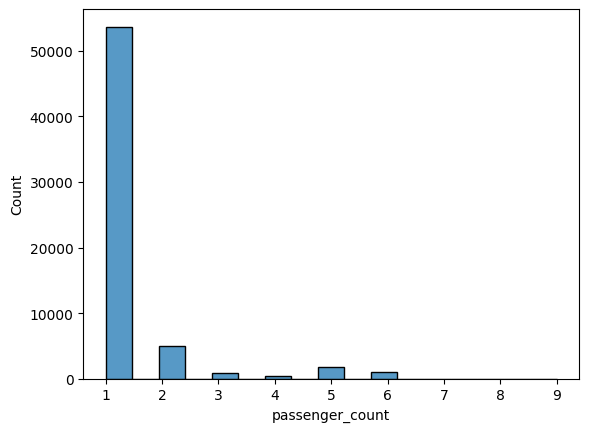

In [4008]:
# Persebaran data passenger count
sns.histplot(data=df_clean, x="passenger_count")

<Axes: xlabel='passenger_count'>

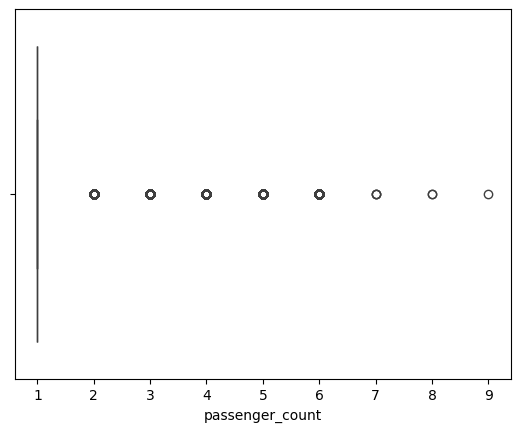

In [4009]:
# Outlier passenger_count
sns.boxplot(data=df_clean, x="passenger_count")

Jika dilihat pada grafik di atas, nilai pada data `passenger_count` hampir seluruhnya bernilai 1, sehingga data-data yang > 1 dapat dianggap sebagai data outlier. Walau begitu, data `passenger_count` tidak bisa secara semerta-merta dihilangkan ataupun diubah menjadi nilai modus maupun nilai median.
- Apabila outlier data `passenger_count` dihilangkan, satu-satunya nilai yang ada pada data `passenger_count` adalah nilai 1 (1 penumpang). Hal ini tidak masuk akal, karena data `passenger_count` yang sepenuhnya bernilai 1 menandakan bahwa tidak ada pemesan layanan antar-jemput New York City TLC yang berpergian secara berkeluarga. 
- Data `passenger_count` sangat right-skewed (tertarik ke kanan), sehingga nilai modus dan median dari data akan terkumpul ke nilai 1, sehingga jika data `passenger_count` diubah menjadi modus atau median, satu-satunya nilai yang ada pada data `passenger_count` adalah nilai 1 (1 penumpang).

In [4010]:
# Lihat value count dari passenger_count
df_clean["passenger_count"].value_counts()

passenger_count
1.0    53691
2.0     5048
5.0     1763
6.0     1050
3.0      943
4.0      360
7.0        3
8.0        2
9.0        1
Name: count, dtype: int64

Jika dilihat dari pembagian jumlah baris berdasarkan nilai `passenger_count`, dapat terlihat bahwa nilai baris yang memiliki nilai `passenger_count` sebesar 2-6 penumpang masih wajar. Sementara itu, hampir tidak ada baris yang memiliki nilai `passenger_count` 7-9. Hal ini masuk akal, karena kapasitas maksimum dari sebuah taksi adalah sekitar 5-6 tempat duduk.

Karena baris dengan nilai `passenger_count` > 6 sangat sedikit, baris-baris ini bisa **dihapus**. 

In [4011]:
# Menghapus nilai "passenger_count" yang > 6
df_clean.drop(index=df_clean[df_clean["passenger_count"] > 6].index, inplace=True)
df_clean.reset_index(drop=True, inplace=True)

#### `trip_distance`

<Axes: xlabel='trip_distance', ylabel='Count'>

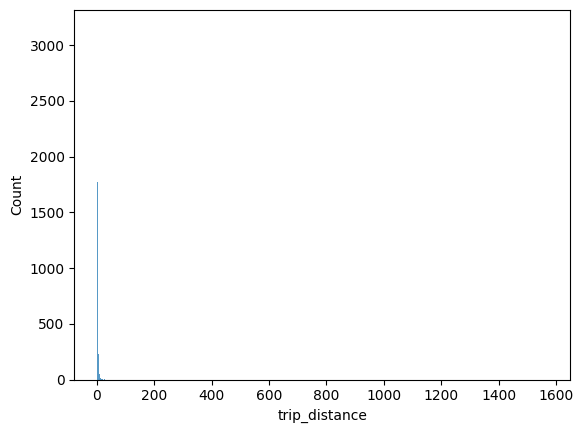

In [4012]:
# Persebaran data trip_distance
sns.histplot(data=df_clean, x="trip_distance")

<Axes: xlabel='trip_distance'>

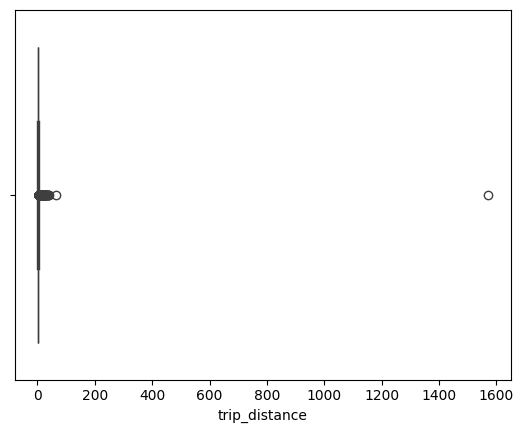

In [4013]:
# Outlier pada data trip_distance
sns.boxplot(data=df_clean, x="trip_distance")

Jika dilihat pada grafik di atas, data-data nilai `trip_distance` banyak terkumpul di rentang 0-100 mil, serta terdapat nilai outlier pada kolom `trip_distance` yang nilainya sangat besar, yaitu di dekat titik 1600 mil. 

In [4014]:
# Lihat data-data yang nilai trip_distance nya sangat tinggi
print(f"trip_distance: {df_clean[df_clean["trip_distance"] > 300]["trip_distance"]}")
print()
df_clean[df_clean["trip_distance"] > 300]


trip_distance: 32808    1571.97
Name: trip_distance, dtype: float64



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone,Vendor,Ratecode,payment,trip
32808,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,...,Queens,Elmhurst,Boro Zone,Manhattan,Upper East Side North,Yellow Zone,VeriFoneInc.,Negotiated fare,Credit card,Street-hail


Setelah diamati, ternyata data yang memiliki `trip_distance` yang sangat tinggi hanya 1 baris saja, yaitu pada baris index **32808**, yang memiliki nilai `trip_distance` sebesar 1571.97 mil, dimana data ini merupakan data dari sebuah perjalanan yang dimulai di titik jemput (`PUZone`) berupa "Elmhurst" dan titik turun (`DOZone`) berupa "Upper East Side North".

In [4015]:
# Data-data perjalanan yang dimulai di Elmhurst dan diakhiri di Upper East Side North
df_clean["trip_distance"][(df_clean["PUZone"] == "Elmhurst") & (df_clean["DOZone"] == "Upper East Side North")]

299         7.77
1511        8.22
6649        8.08
32808    1571.97
Name: trip_distance, dtype: float64

In [4016]:
# Rata-rata trip_distance dari data perjalanan tersebut (tanpa data outlier)
df_clean["trip_distance"][(df_clean["PUZone"] == "Elmhurst") & (df_clean["DOZone"] == "Upper East Side North") & (df_clean["trip_distance"] < 100)].mean()

np.float64(8.023333333333333)

Seperti yang dapat dilihat di atas, perjalanan-perjalanan yang dimulai dari Elmhurst dan diakhiri di Upper East Side North secara rata-rata memiliki `trip_distance` sebesar 8.023. Agar nilai pada data perjalanan outlier ini selaras dengan data perjalanan Elmhurst-Upper East Side North lainnya, `trip_distance` dari data tersebut akan diubah menjadi rata-rata `trip_distance` untuk perjalanan Elmhurst-Upper East Side North, yaitu 8.023.

In [4017]:
# Pengubahan data outlier trip_distance 
df_clean["trip_distance"][32808] = df_clean["trip_distance"][(df_clean["PUZone"] == "Elmhurst") & (df_clean["DOZone"] == "Upper East Side North") & (df_clean["trip_distance"] < 100)].mean()
df_clean["trip_distance"][32808]

np.float64(8.023333333333333)

<Axes: xlabel='trip_distance', ylabel='Count'>

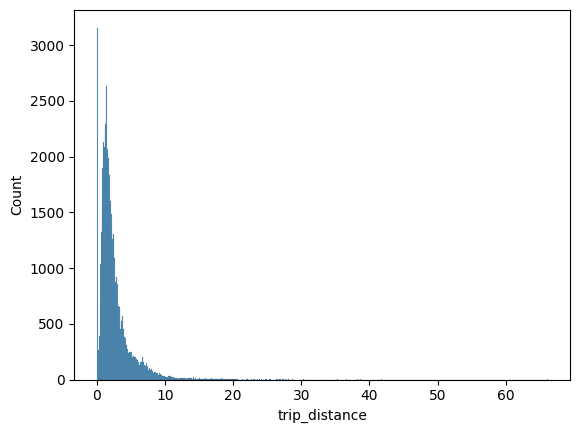

In [4018]:
# Persebaran data trip_distance baru
sns.histplot(data=df_clean, x="trip_distance")

<Axes: xlabel='trip_distance'>

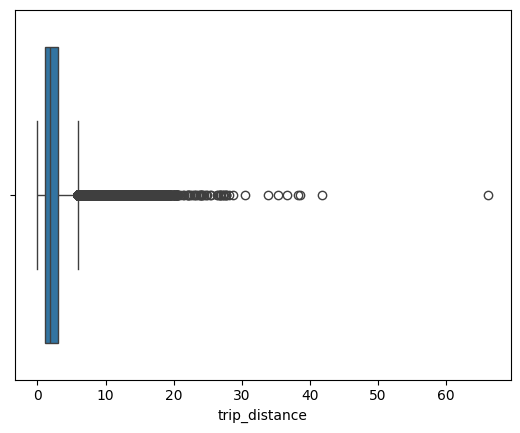

In [4019]:
# Outlier pada data trip_distance baru
sns.boxplot(data=df_clean, x="trip_distance")

Seperti yang dapat terlihat, masih ada beberapa data outlier yang tersisa pada data `trip_distance`. Untuk menghilangkan outlier ini, mari kita lihat persebaran data dalam kuartil.

In [4020]:
df_clean['trip_distance'].quantile(
    [0.90, 0.95, 0.97, 0.98, 0.99, 0.995, 0.999]
)

0.900     5.39000
0.950     7.24000
0.970     8.57380
0.980     9.86000
0.990    12.79000
0.995    15.97730
0.999    20.00292
Name: trip_distance, dtype: float64

Jika dilihat dari persebaran kuartil data, dapat dilihat bahwa 99% dari nilai `trip_distance` pada data bernilai kurang dari atau sama dengan 20.00292 mil. Maka dari itu, nilai `trip_distance` yang lebih besar dari 20.00292 akan dihapus.

In [4021]:
df_clean_old = df_clean
df_clean = df_clean[df_clean["trip_distance"] <= 20.00292]
print(f"Jumlah data yang tersisa setelah outlier dikurangi: {len(df_clean)/len(df_clean_old):.2%}")
df_clean.reset_index(drop=True, inplace=True)

Jumlah data yang tersisa setelah outlier dikurangi: 99.90%


#### `fare_amount`

<Axes: xlabel='fare_amount', ylabel='Count'>

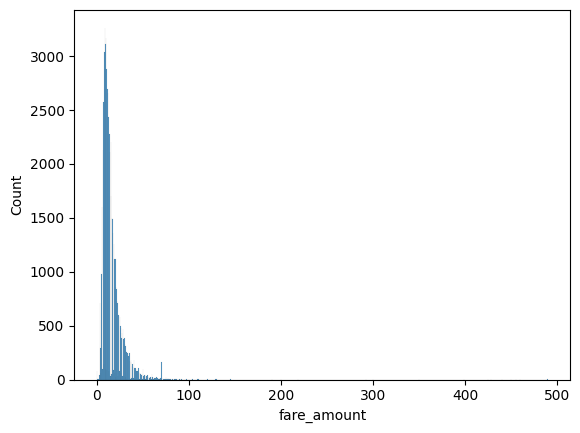

In [4022]:
# Persebaran data trip_distance baru
sns.histplot(data=df_clean, x="fare_amount")

<Axes: xlabel='fare_amount'>

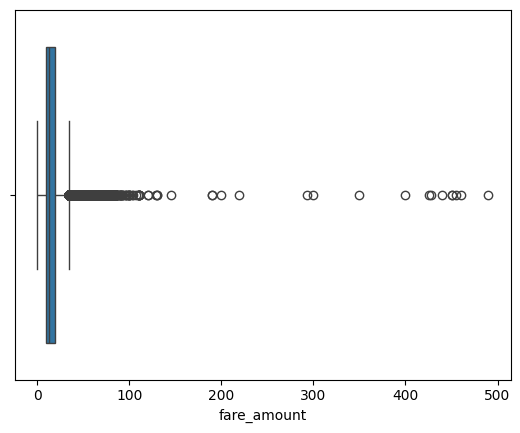

In [4023]:
# Outlier pada data trip_distance baru
sns.boxplot(data=df_clean, x="fare_amount")

Jika dilihat pada grafik di atas, data-data nilai `fare_amount` banyak terkumpul di rentang 0-25 dollar, serta terdapat beberapa nilai outlier pada kolom `fare_amount` yang nilainya sangat besar, yaitu sekitar 400-500 dollar. Agar nilai outlier dapat dipahami dengan lebih detail, mari kita lihat scatterplot antara data `trip_distance` dan `fare_amount` untuk melihat hubungan antara keduanya.

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

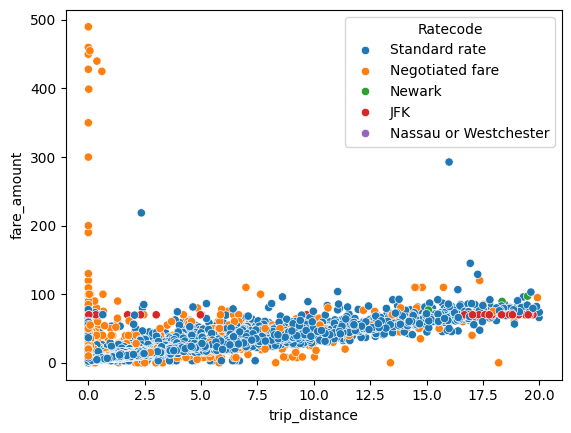

In [4024]:
# Melihat hubungan antara trip_distance dan fare_amount
sns.scatterplot(data=df_clean, x="trip_distance", y="fare_amount", hue="Ratecode")

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

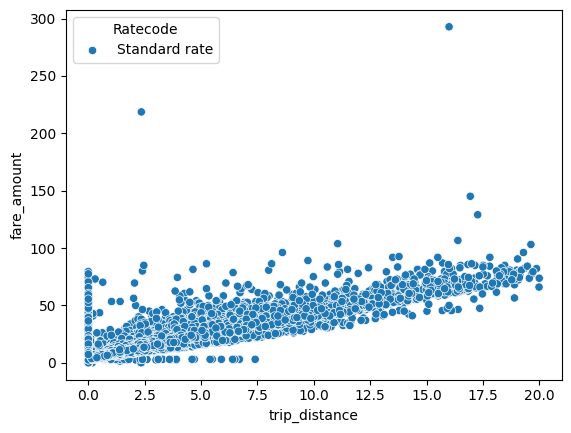

In [4025]:
sns.scatterplot(data=df_clean[df_clean["Ratecode"] == "Standard rate"], x="trip_distance", y="fare_amount", hue="Ratecode")

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

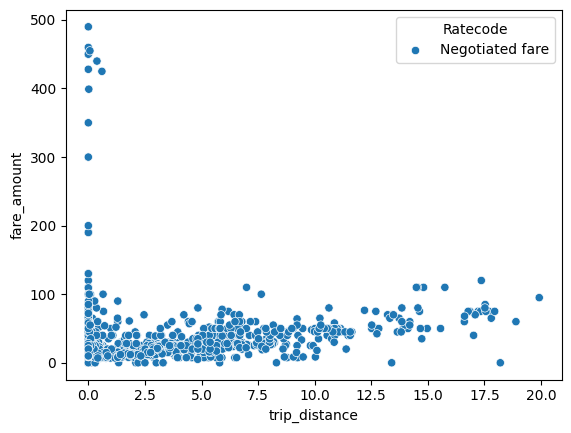

In [4026]:
sns.scatterplot(data=df_clean[df_clean["Ratecode"] == "Negotiated fare"], x="trip_distance", y="fare_amount", hue="Ratecode")

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

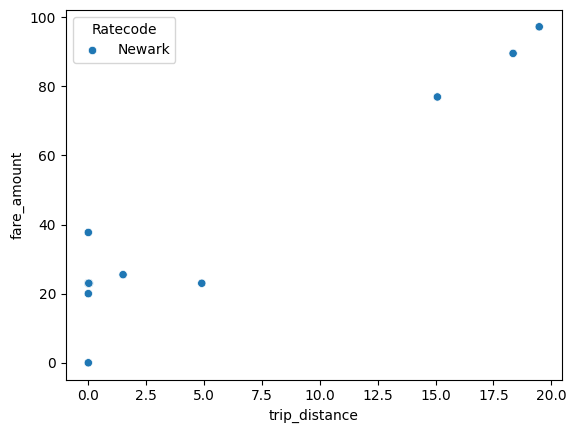

In [4027]:
sns.scatterplot(data=df_clean[df_clean["Ratecode"] == "Newark"], x="trip_distance", y="fare_amount", hue="Ratecode")

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

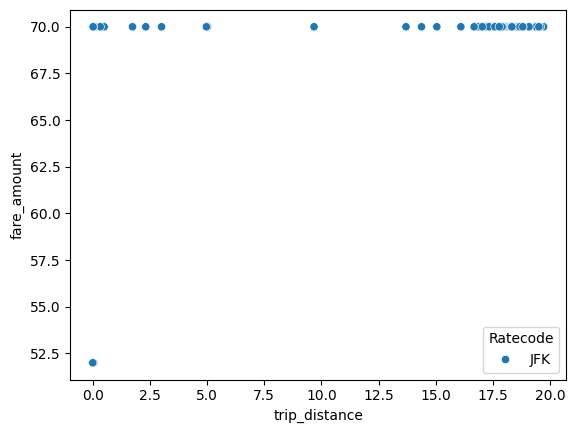

In [4028]:
sns.scatterplot(data=df_clean[df_clean["Ratecode"] == "JFK"], x="trip_distance", y="fare_amount", hue="Ratecode")

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

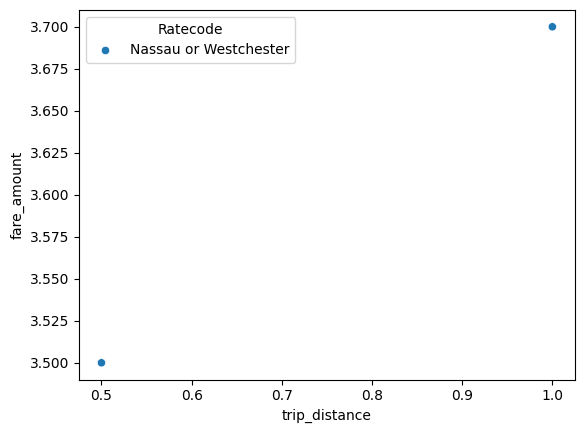

In [4029]:
sns.scatterplot(data=df_clean[df_clean["Ratecode"] == "Nassau or Westchester"], x="trip_distance", y="fare_amount", hue="Ratecode")

Jika dilihat pada grafik-grafik di atas, dapat terlihat bahwa terdapat data-data ekstrim pada kolom `fare_amount` untuk perjalanan-perjalanan dengan `Ratecode` "Standard rate", "Negotiated fare", "Newark" dan "JFK", dimana data-data ini merupakan data-data yang tingkat `fare_amount`nya berbeda secara signifikan dari trend umum `fare_amount` terhadap `trip_distance` dari perjalanan-perjalanan dengan `Ratecode` yang sama.

In [4030]:
# Menghitung nilai outlier pada fare_rate data dengan Ratecode "Standard rate", "Negotiated fare", "Newark" dan "JFK"
outlier_standard_rate_1 = df_clean[(df_clean["Ratecode"] == "Standard rate") 
   & (df_clean["trip_distance"] <= 1) 
   & (df_clean["fare_amount"] >= 50)].copy()

outlier_standard_rate_2 = df_clean[(df_clean["Ratecode"] == "Standard rate") 
   & (df_clean["fare_amount"] >= 200)].copy()

outlier_standard_rate = pd.concat([outlier_standard_rate_1, outlier_standard_rate_2], axis=0)

outlier_negotiated_fare_1 = df_clean[(df_clean["Ratecode"] == "Negotiated fare") 
   & (df_clean["trip_distance"] <= 1) 
   & (df_clean["fare_amount"] >= 90)].copy()

outlier_negotiated_fare_2 = df_clean[(df_clean["Ratecode"] == "Negotiated fare") 
   & (df_clean["trip_distance"] >= 12) 
   & (df_clean["fare_amount"] <= 20)].copy()

outlier_negotiated_fare = pd.concat([outlier_negotiated_fare_1, outlier_negotiated_fare_2], axis=0)

outlier_newark = df_clean[(df_clean["Ratecode"] == "Newark") 
   & (df_clean["trip_distance"] <= 2.5) 
   & (df_clean["fare_amount"] >= 30)].copy()

outlier_jfk = df_clean[(df_clean["Ratecode"] == "JFK") 
   & (df_clean["fare_amount"] < 70)].copy()

print(f"Total outlier untuk perjalanan dengan standard rate: {len(outlier_standard_rate)}")
print(f"Total outlier untuk perjalanan dengan negotiated fare: {len(outlier_negotiated_fare)}")
print(f"Total outlier untuk perjalanan dengan fare rate Newark: {len(outlier_newark)}")
print(f"Total outlier untuk perjalanan dengan fare rate JFK: {len(outlier_jfk)}")

Total outlier untuk perjalanan dengan standard rate: 84
Total outlier untuk perjalanan dengan negotiated fare: 27
Total outlier untuk perjalanan dengan fare rate Newark: 1
Total outlier untuk perjalanan dengan fare rate JFK: 2


Untuk mengatasi hal ini, data-data outlier ini akan diubah menjadi nilai median dari data-data dengan `Ratecode` yang sama. Pengubahan data dipilih untuk menghindari perubahan data yang terlalu banyak karena adanya terlalu banyak data yang hilang, sementara itu pengubahan data menjadi nilai median dilakukan karena data tidak terdistribusi secara normal. 

In [4031]:
# Cari nilai median dari data dengan fare rate standard rate, negotiated fare, Newark dan JFK
df_standard_median = df_clean["fare_amount"].median()
df_negotiated_median = df_clean["fare_amount"].median()
df_newark_median = df_clean["fare_amount"].median()
df_jfk_median = df_clean["fare_amount"].median()

In [4032]:
# Mengubah nilai outlier menjadi nilai median
for i in range(len(df_clean)):
    if (df_clean["Ratecode"][i] == "Standard rate"):

        if (df_clean["trip_distance"][i] <= 1) and (df_clean["fare_amount"][i] >= 50):
            df_clean["fare_amount"][i] = df_standard_median
        
        elif (df_clean["fare_amount"][i] >= 200):
            df_clean["fare_amount"][i] = df_standard_median

    elif (df_clean["Ratecode"][i] == "Negotiated fare"):

        if (df_clean["trip_distance"][i] <= 1) and (df_clean["fare_amount"][i] >= 90):
            df_clean["fare_amount"][i] = df_negotiated_median

        elif (df_clean["trip_distance"][i] >= 12) and (df_clean["fare_amount"][i] <= 20):
            df_clean["fare_amount"][i] = df_negotiated_median

    elif (df_clean["Ratecode"][i] == "Newark"):

        if (df_clean["trip_distance"][i] <= 2.5) and (df_clean["fare_amount"][i] >= 30):
            df_clean["fare_amount"][i] = df_newark_median

    elif (df_clean["Ratecode"][i] == "JFK"):

        if (df_clean["fare_amount"][i] < 70):
            df_clean["fare_amount"][i] = df_jfk_median


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

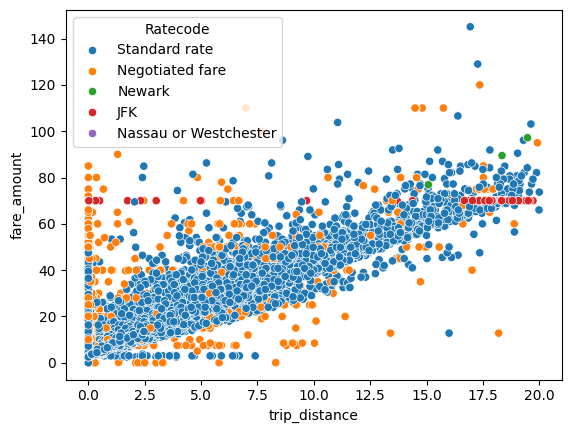

In [4033]:
# Melihat hubungan antara trip_distance dan fare_amount
sns.scatterplot(data=df_clean, x="trip_distance", y="fare_amount", hue="Ratecode")

#### `tip_amount`

<Axes: xlabel='tip_amount', ylabel='Count'>

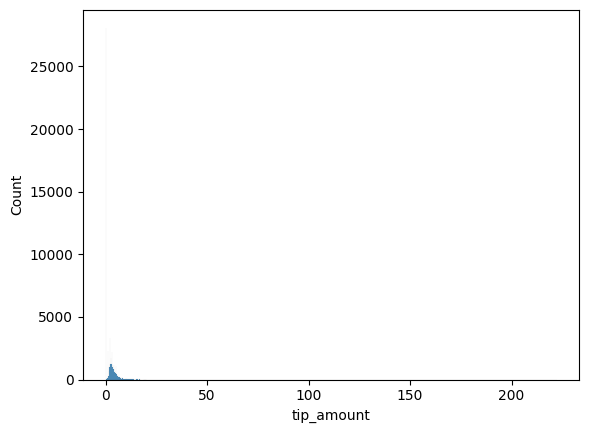

In [4034]:
sns.histplot(data=df_clean, x="tip_amount")

<Axes: xlabel='tip_amount'>

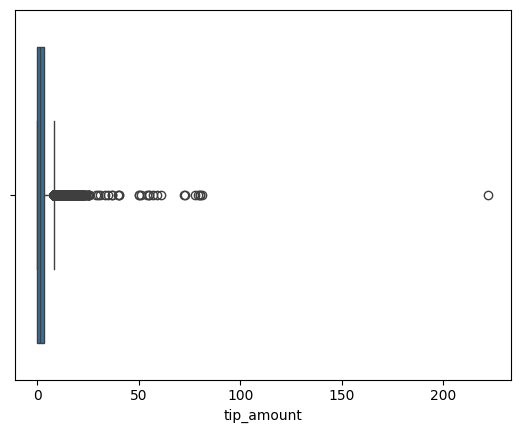

In [4035]:
sns.boxplot(data=df_clean, x="tip_amount")

<Axes: xlabel='payment_type', ylabel='tip_amount'>

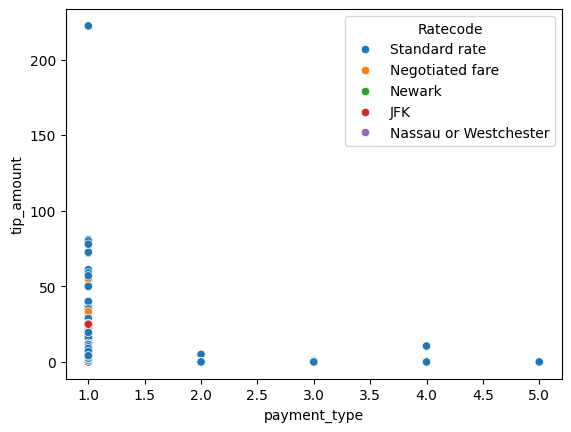

In [4036]:
sns.scatterplot(
    data=df_clean,
    x="payment_type",
    y="tip_amount",
    hue="Ratecode"
)

In [4037]:
df_clean_old = df_clean
df_clean = df_clean[df_clean["tip_amount"] < 50]
df_clean.reset_index(drop=True, inplace=True)

<Axes: xlabel='payment_type', ylabel='tip_amount'>

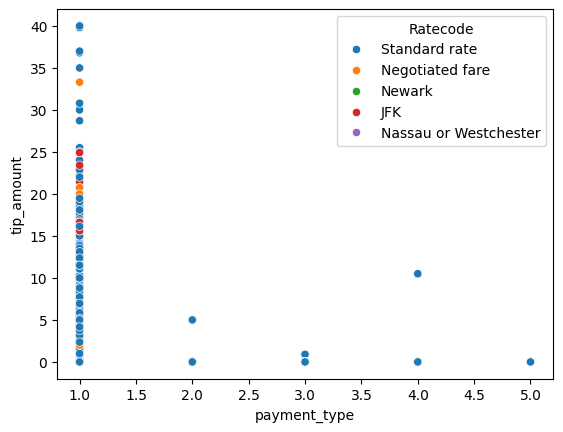

In [4038]:
sns.scatterplot(
    data=df_clean,
    x="payment_type",
    y="tip_amount",
    hue="Ratecode"
)

In [4039]:
print(f"Total data outlier: {len(df_clean_old) - len(df_clean)}")
print(f"Jumlah data yang tersisa setelah menghilangkan data outlier: {len(df_clean)/len(df):.2%}")

Total data outlier: 17
Jumlah data yang tersisa setelah menghilangkan data outlier: 92.03%


### Cek ulang `total_amount`

Nilai `total_amount` pada data sejatinya merupakan nilai total dari data `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, dan `congestion_surcharge`. Nilai yang tersimpan pada data bisa jadi berbeda dengan nilai perhitungan aslinya, sehingga nilai `total_amount` harus diselaraskan.

In [4040]:
# Kalkulasi total_fare berdasarkan nilai-nilai yang berkaitan
df_clean["total_fare"] = (
    df_clean["fare_amount"]
    + df_clean["extra"]
    + df_clean["mta_tax"]
    + df_clean["tip_amount"]
    + df_clean["tolls_amount"]
    + df_clean["improvement_surcharge"]
    + df_clean["congestion_surcharge"]
    )

In [4041]:
total_incons_amount = 0
for row in range(len(df_clean)):
    if df_clean["total_amount"][row] != df_clean["total_fare"][row]:
        total_incons_amount += 1
        df_clean["total_amount"][row] = df_clean["total_fare"][row]

In [4042]:
print(f"Jumlah data yang total_amountnya tidak selaras dengan data: {total_incons_amount} - {total_incons_amount/len(df_clean):.2%}")

Jumlah data yang total_amountnya tidak selaras dengan data: 13981 - 22.27%


In [4043]:
df_clean.drop("total_fare", axis=1, inplace=True)

### Re-check Values

Setelah data diubah, dataset baiknya dicek ulang untuk memastikan proses *data cleaning* yang sebelumnya telah dilakukan tidak memunculkan anomali-anomali baru pada dataset.

In [4044]:
# Cek ulang duplikat pada dataset
df_clean.duplicated().sum()

np.int64(167)

Ternyata proses *data cleaning* yang baru saja dilakukan memunculkan nilai-nilai duplikat baru pada data. Agar duplikat ini tidak mengganggu pada proses analisis data, baiknya data duplikat ini **dihapus**

In [4045]:
# Menghapus data perjalanan duplikat
df_clean.drop_duplicates(inplace=True)

In [4046]:
# Mengamati nilai unik pada dataset
list_item = []
for col in df_clean.columns:
    list_item.append([col, df_clean[col].nunique(), df_clean[col].unique()])

pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,61607,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 0..."
2,lpep_dropoff_datetime,61543,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 0..."
3,store_and_fwd_flag,2,"[N, Y]"
4,RatecodeID,5,"[1.0, 5.0, 3.0, 2.0, 4.0]"
5,PULocationID,218,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 80, 25, 145, 33, 226, 52, 169, 36, 157, 168, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 56, 244, 263, 37, 236, 213, 28, 117, 14, 188, 171, 177, 29, 262, 250, 72, 196, 216, 22, 20, 257, 193, 55, 127, 219, 3, 119, 167, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, 215, 10, 49, 197, 9, 59, ...]"
6,DOLocationID,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, 119, 241, ...]"
7,passenger_count,6,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
8,trip_distance,1597,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2...."
9,fare_amount,326,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 3.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 50.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 40.0, 31.7, 40.8, 80.0, 14.5, 43.6, 23.0, 90.0, 49.2, 20.0, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7.0, 78.0, 27.5, 32.4, 70.0, ..."


In [4047]:
print(f"Jumlah data yang tersisa setelah data dibersihkan: {len(df_clean)/len(df):.2%}")

Jumlah data yang tersisa setelah data dibersihkan: 91.79%


### Penyimpanan Data Bersih

Setelah dibersihkan, dataset yang sudah bersih baiknya disimpan ke dalam file csv terlebih dahulu sebelum diolah dan dianalisis secara lebih lanjut.

In [4048]:
df_clean.to_csv("df_clean.csv", index=False)

## **2.2. Data yang Sudah Bersih**

In [4049]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62608 entries, 0 to 62774
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62608 non-null  int64         
 1   lpep_pickup_datetime   62608 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62608 non-null  datetime64[ns]
 3   store_and_fwd_flag     62608 non-null  object        
 4   RatecodeID             62608 non-null  float64       
 5   PULocationID           62608 non-null  int64         
 6   DOLocationID           62608 non-null  int64         
 7   passenger_count        62608 non-null  float64       
 8   trip_distance          62608 non-null  float64       
 9   fare_amount            62608 non-null  float64       
 10  extra                  62608 non-null  float64       
 11  mta_tax                62608 non-null  float64       
 12  tip_amount             62608 non-null  float64       
 13  tolls_

In [4050]:
df_clean.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,62608.000000,62608,62608,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000,62608.000000
mean,1.860321,2023-01-16 22:47:57.473677312,2023-01-16 23:05:52.436749568,1.081667,96.850562,137.172278,1.322882,2.510745,15.684522,0.889048,0.627815,2.017135,0.133672,0.954848,21.044373,1.368244,1.017745,0.737334
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:44:23,2023-01-09 12:59:38,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 09:00:09,2023-01-17 09:14:40.500000,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.460000,0.000000,1.000000,17.700000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:26:45,2023-01-24 16:43:25.500000,1.000000,116.000000,216.000000,1.000000,3.040000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.600000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,263.000000,263.000000,6.000000,20.000000,145.100000,7.500000,2.750000,40.000000,25.500000,1.000000,156.600000,5.000000,2.000000,2.750000
std,0.346656,NaN,NaN,0.558342,59.165792,76.184983,0.976867,2.391368,10.446269,1.289260,0.355645,2.576793,0.934359,0.174005,12.527076,0.498871,0.132025,1.218142


In [4051]:
list_item = []
for col in df_clean.columns:
    list_item.append([col, df_clean[col].nunique(), df_clean[col].unique()])

pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=list_item)

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,61607,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 0..."
2,lpep_dropoff_datetime,61543,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 0..."
3,store_and_fwd_flag,2,"[N, Y]"
4,RatecodeID,5,"[1.0, 5.0, 3.0, 2.0, 4.0]"
5,PULocationID,218,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, 97, 7, 42, 95, 260, 134, 130, 258, 129, 116, 92, 65, 74, 17, 152, 210, 112, 69, 243, 82, 179, 80, 25, 145, 33, 226, 52, 169, 36, 157, 168, 43, 256, 173, 70, 251, 40, 101, 61, 241, 146, 147, 228, 56, 244, 263, 37, 236, 213, 28, 117, 14, 188, 171, 177, 29, 262, 250, 72, 196, 216, 22, 20, 257, 193, 55, 127, 219, 3, 119, 167, 78, 135, 247, 93, 159, 48, 31, 91, 53, 160, 94, 47, 254, 215, 10, 49, 197, 9, 59, ...]"
6,DOLocationID,246,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140, 234, 148, 255, 186, 210, 129, 68, 260, 42, 24, 244, 146, 135, 173, 216, 142, 164, 7, 83, 95, 130, 223, 80, 48, 263, 196, 250, 226, 239, 189, 41, 168, 162, 141, 33, 145, 151, 116, 195, 249, 235, 160, 98, 79, 229, 181, 193, 237, 233, 102, 10, 37, 258, 82, 170, 61, 112, 231, 97, 17, 169, 96, 219, 243, 236, 56, 36, 114, 157, 161, 54, 90, 40, 188, 70, 63, 251, 101, 92, 153, 53, 57, 256, 65, 257, 138, 85, 52, 119, 241, ...]"
7,passenger_count,6,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0]"
8,trip_distance,1597,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1.11, 4.22, 4.8, 1.99, 7.08, 3.23, 5.91, 11.3, 8.28, 2.02, 0.96, 0.53, 1.51, 0.88, 2.48, 3.53, 2.25, 4.29, 2.53, 1.7, 6.78, 1.39, 1.31, 6.7, 3.52, 1.74, 2.31, 1.37, 10.35, 1.05, 6.19, 2.8, 1.13, 3.19, 1.26, 2.87, 8.55, 4.46, 1.18, 2.5, 9.01, 0.63, 2.08, 1.47, 7.83, 2.15, 12.73, 1.62, 7.3, 2.73, 4.9, 2.17, 0.6, 0.8, 2.39, 1.23, 10.45, 2.23, 2.21, 5.2, 5.25, 6.32, 3.82, 3.58, 0.7, 2.91, 5.13, 12.4, 1.45, 7.52, 2.45, 0.54, 0.47, 1.16, 15.39, 5.34, 2...."
9,fare_amount,326,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, 24.7, 26.8, 11.4, 30.3, 35.9, 32.5, 15.0, 44.3, 12.8, 8.6, 5.8, 16.3, 19.8, 18.4, 13.5, 8.0, 60.0, 7.9, 10.0, 3.0, 47.1, 5.5, 17.0, 75.0, 15.6, 47.8, 21.2, 37.3, 52.0, 4.4, 51.3, 25.5, 5.1, 9.3, 29.6, 48.5, 28.2, 21.9, 5.0, 4.0, 25.4, 36.6, 66.0, 50.0, 20.5, 46.4, 12.1, 31.0, 33.8, 26.1, 22.6, 15.5, 24.0, 25.0, 10.5, 19.5, 40.0, 31.7, 40.8, 80.0, 14.5, 43.6, 23.0, 90.0, 49.2, 20.0, 16.0, 28.9, 30.0, 25.8, 35.0, 35.2, 7.0, 78.0, 27.5, 32.4, 70.0, ..."


# **3. Data Analysis**

Setelah *data cleaning* telah dilakukan, *data analysis* kemudian dapat dilakukan untuk menjawab permasalahan yang telah ditentukan di awal analysis ini, yaitu: **Bagaimana mengoptimalkan struktur tarif, jarak, dan waktu tempuh untuk meningkatkan efisiensi dan profitabilitas layanan taksi?**


Agar struktur tarif dapat dioptimasi, kita perlu melihat hubungan antara tarif yang telah diterapkan dengan jarak dan waktu tempuh dari perjalanan yang dilakukan.

### Analisis Perbandingan Tarif terhadap Jarak

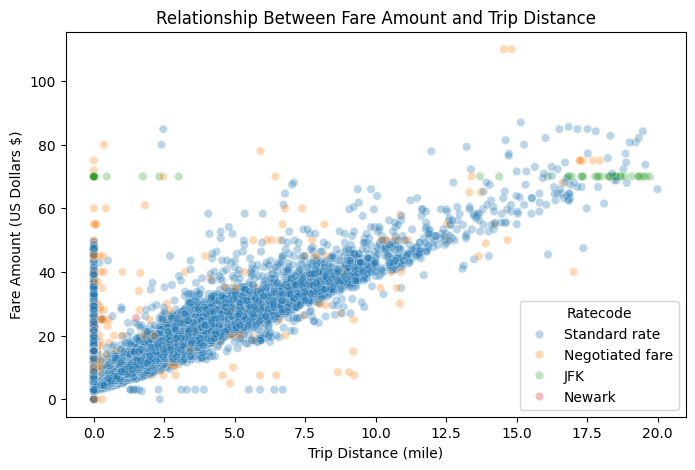

In [4052]:
# Perbandingan tarif terhadap jarak secara umum
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean.sample(20000, random_state=42),
    x="trip_distance",
    y="fare_amount",
    alpha=0.3, 
    hue="Ratecode"
)
plt.title("Relationship Between Fare Amount and Trip Distance")
plt.xlabel("Trip Distance (mile)")
plt.ylabel("Fare Amount (US Dollars $)")
plt.show()

Dari scatterplot perbandingan tarif dengan jarak tempuh perjalanan secara umum pada bulan Januari tahun 2023, dapat terlihat bahwa: 
- Tarif (fare) yang perlu dibayar setelah perjalanan cenderung naik seiring dengan bertambahnya jarak yang ditempuh.
    - Karena tarif pada taksi biasanya dihitung berdasarkan jarak perjalanan, tarif umumnya akan naik seiring dengan bertambahnya jarak perjalanan.
        - Insight: **Tarif bekerja sebagaimana umumnya**, dimana **semakin panjang jarak perjalanan, semakin tinggi tarif yang dibebankan ke penumpang**.
- Tarif (fare) yang perlu dibayar memiliki persebaran (spread) yang lebar. 
    - Variasi tarif untuk perjalanan-perjalanan dengan jarak tempuh yang sama masih besar.
        - Insight: **Tarif belum sepenuhnya efisien terhadap jarak tempuh**.
            - Bisa jadi disebabkan oleh **kondisi lalu lintas yang bervariasi, seperti misalnya adanya kemacetan berkala**
        - Insight: **Profit yang didapatkan oleh perusahaan belum sepenuhnya stabil terhadap jarak tempuh**.
- Tarif "standard rate" merupakan tarif yang terlihat paling banyak pada grafik.

Jika ditinjau dari segi jarak tempuh perjalanan, dapat terlihat bahwa:
- Tarif pada jarak rendah (<1 mil) memiliki variasi nilai yang yang ekstrim, dimana banyak perjalanan pada jarak ini memiliki tarif tinggi (>$20 atau bahkan >$40), walaupun jarak tempuhnya relatif sangat rendah.
    - Persebaran tarif pada perjalanan yang jarak tempuhnya relatif sangat rendah (< 1 mil) jauh lebih tinggi daripada persebaran tarif pada perjalanan dengan jarak tempuh lain.
        - Insight: **Tarif pada perjalanan jarak rendah belum tentu bernilai kecil**
        - Insight: **Tarif pada perjalanan jarak rendah lebih tidak stabil terhadap jarak dibandingkan pada perjalanan jarak menengah dan tinggi**
            - Bisa disebabkan oleh **adanya kemacetan ekstrim** atau **kesalahan driver (lupa end-trip setelah perjalanan selesai)**
- Tarif pada jarak menengah (3-10 mil) memiliki kepadatan tertinggi, pola yang stabil, serta variasi nilai yang tidak sebesar tarif pada data-data ekstrim.
    - Insight: **Jarak menengah merupakan jarak sweet-spot dengan profitabilitas tertinggi**
- Tarif pada jarak tinggi (12-15 mil) memiliki kepadatan yang lebih rendah, variasi nilai yang lebih besar, dan jumlah data ekstrim yang lebih tinggi daripada pada jarak menengah.
    - Insight: **Perjalanan jarak tinggi belum tentu merupakan perjalanan paling menguntungkan**
        - Bisa disebabkan oleh **durasi lama**

Untuk melihat apakah tarif "standard rate" merupakan tarif mayoritas, jumlah data untuk tiap jenis tarif bisa dibandingkan.

In [4053]:
# Perbandingan jumlah data untuk setiap jenis tarif
list_of_rates = list(df_clean.Ratecode.unique())
trips_per_rate = list(df_clean.Ratecode.value_counts())

for rate in range(len(list_of_rates)):
    print(f"{list_of_rates[rate]}: {trips_per_rate[rate]}")

Standard rate: 61211
Negotiated fare: 1231
Newark: 145
JFK: 19
Nassau or Westchester: 2


In [4054]:
# Perbandingan jumlah data untuk setiap jenis tarif dalam persentase
list_of_rates = list(df_clean.Ratecode.unique())
trips_per_rate = list(df_clean.Ratecode.value_counts())

for rate in range(len(list_of_rates)):
    print(f"{list_of_rates[rate]}: {trips_per_rate[rate]/len(df_clean):.2%}")

Standard rate: 97.77%
Negotiated fare: 1.97%
Newark: 0.23%
JFK: 0.03%
Nassau or Westchester: 0.00%


Dari perbandingan jumlah data berdasarkan tarif, dapat terlihat bahwa:
- Hampir seluruh perjalanan (97.77%) menggunakan tarif "standard rate"
    - Insight: **Perjalanan dengan tarif "standard rate" merupakan jenis perjalanan yang paling penting bagi perusahaan**

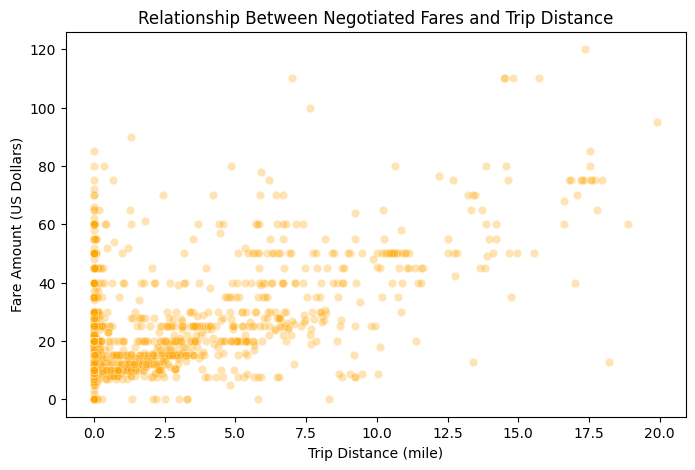

In [4055]:
# Perbandingan tarif terhadap jarak pada perjalanan dengan tarif negotiated fare
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean[df_clean["Ratecode"] == "Negotiated fare"],
    x="trip_distance",
    y="fare_amount",
    alpha=0.3, 
    color= "orange"
)
plt.title("Relationship Between Negotiated Fares and Trip Distance")
plt.xlabel("Trip Distance (mile)")
plt.ylabel("Fare Amount (US Dollars)")
plt.show()

Dari scatterplot perbandingan tarif dengan jarak tempuh perjalanan dengan tarif "Negotiated fare" saja, dapat terlihat bahwa:
- Persebaran nilai relatif lebih besar dibandingkan dengan perjalanan dengan tarif "standard rate". Tidak hanya itu, terdapat **banyak titik-titik data yang tidak mengikuti pola utama**, dimana tarif meningkat seiring dengan penambahan jarak perjalanan.
    - Variabilitas tarif tinggi, kemungkinan disebabkan oleh proses penentuan tarif, dimana **tarif yang dinegosiasikan tidak konsisten dan bisa jadi jauh dari tarif standar**. 
        - Insight: **Negotiated fare menyebabkan noise yang dapat mempengaruhi struktur tarif sistemik, sehingga perlu dimonitoring**

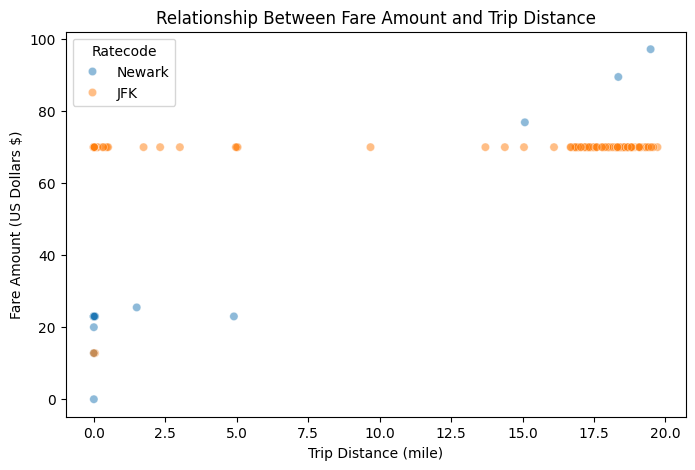

In [4056]:
# Perbandingan tarif terhadap jarak secara umum
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean[(df_clean["Ratecode"] == "JFK") | (df_clean["Ratecode"] == "Newark")],
    x="trip_distance",
    y="fare_amount",
    alpha=0.5, 
    hue="Ratecode"
)
plt.title("Relationship Between Fare Amount and Trip Distance")
plt.xlabel("Trip Distance (mile)")
plt.ylabel("Fare Amount (US Dollars $)")
plt.show()

Dari scatterplot perbandingan tarif dengan jarak tempuh perjalanan dengan tarif "JFK" dan "Newark" saja, dapat terlihat bahwa:
- Tarif perjalanan dengan jenis tarif "JFK" dan "Newark" memiliki persebaran yang kecil. 
- Tarif "JFK" tidak mengikuti logika tarif umum "kenaikan jarak menyebabkan kenaikan tarif" seperti halnya dengan tarif "standard rate" dan "negotiated fare", dimana tarif "JFK" tidak meningkat seiring dengan penambahan jarak tempuh.
    - Insight: **Tarif "JFK" predictable dan konsisten, namun tidak selalu efisien terhadap jarak (berisiko untuk over/underpricing)**
- Insight: **Tarif "Newark" konsisten dalam mengikuti pola tarif umum "kenaikan jarak menyebabkan kenaikan tarif" pada data perjalanan jauh (2.5 mil ke atas), tapi tidak pada data perjalanan dekat (<2.5 mil)**
    - Karena tarif "Newark" menandakan tarif perjalanan ke Newark Liberty International Airport, ketidakkonsistenan tarif dalam mengikuti pola tarif umum bisa disebabkan oleh **kemacetan pada jalan menuju bandara**

### Analisis Perbandingan Tarif terhadap Waktu

In [4057]:
# Membuat variabel "trip_duration_minute", yang menggambarkan lama perjalanan dalam menit 
df_clean["trip_duration_minute"] = (df_clean["lpep_dropoff_datetime"] - df_clean["lpep_pickup_datetime"]).dt.total_seconds()/60

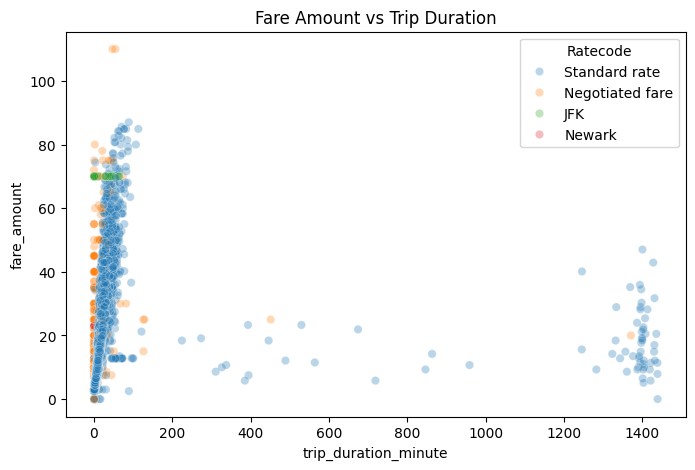

In [4058]:
# Perbandingan tarif terhadap waktu secara umum
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean.sample(20000, random_state=42),
    x='trip_duration_minute',
    y='fare_amount',
    alpha=0.3, 
    hue="Ratecode"
)
plt.title('Fare Amount vs Trip Duration')
plt.show()

Dari scatterplot perbandingan tarif dengan lama perjalanan secara umum pada bulan Januari tahun 2023, dapat terlihat bahwa: 
- Hampir semua dari perjalanan memiliki durasi < 150 menit.
    - Perjalanan dengan durasi 300-1400 menit sangat sedikit dibandingkan dengan perjalanan dengan durasi < 150 menit.
        - Insight: **Perjalanan dengan durasi >300 menit dapat dianggap sebagai outlier, bukan sebagai data perjalanan normal**
    - Perjalanan dengan durasi 1400 merupakan data ekstrim. Kemungkinan besar terjadi karena **macet ekstrim**, **kesalahan pencatatan pada alat** atau karena **kesalahan pada driver (lupa end-trip pada aplikasi walau perjalanan sudah selesai)**
- Tarif tidak meningkat bersamaan dengan peningkatan durasi perjalanan. 
    - Insight: **Tarif tidak terlalu dipengaruhi oleh waktu**
    - Insight: **Dengan tarif saat ini, perjalanan panjang merugikan driver, karena pendapatan tidak naik seiring dengan lama perjalanan**


## Analisis Perjalanan Jarak Pendek

Seperti yang telah kita ketahui setelah analisis perbandingan tarif terhadap jarak, perjalanan dengan jarak rendah lebih tidak efisien dibandingkan dengan perjalan dengan jarak lainnya. Untuk mengetahui alasannya, kita bisa menganalisis jarak, durasi dan tarif yang didapatkan dari perjalanan dengan jarak rendah.

In [4059]:
short_trips = df_clean[df_clean["trip_distance"] < 1]
short_trips[["trip_distance","trip_duration_minute","fare_amount"]].describe()

,trip_distance,trip_duration_minute,fare_amount
count,12933.000000,12933.000000,12933.000000
mean,0.539402,11.579653,9.383977
std,0.349178,73.049949,8.336000
min,0.000000,0.000000,0.000000
25%,0.180000,3.333333,5.800000
50%,0.650000,4.983333,7.200000
75%,0.840000,7.183333,8.600000
max,0.990000,1439.883333,85.000000


Dari deskripsi statistik data di atas, dapat diketahui bahwa:
- Jarak tempuh mengalami peningkatan  dari kuartil pertama (Q1) ke kuartil kedua (Q2) data yang relatif tinggi jika dibandingkan dengan peningkatan dari kuartil kedua ke kuartil ketiga (Q3). 
- Sementara itu, durasi perjalanan mengalami peningkatan dari Q2 ke Q3 data yang relatif tinggi jika dibandingkan dengan peningkatan dari Q1 ke Q2 data.
- Terakhir, tarif mengalami peningkatan yang relatif konsisten di setiap kuartil.
    - Tingkat peningkatan tarif tidak berubah walaupun tingkat peningkatan jarak tempuh menurun, dan tidak berubah walaupun tingkat peningkatan durasi perjalanan meningkat.
        - Insight: **Tarif relatif konsisten, dan peningkatannya tidak sensitif terhadap peningkatan jarak tempuh maupun peningkatan durasi perjalanan** 
        - Insight: Karena tarif relatif konsisten walau jarak tempuh dan durasi meningkat, **tarif pada data perjalanan rendah terpengaruhi paling besar oleh tarif minimum**
- Maksimum durasi perjalanan sangat tinggi dibandingkan median durasi perjalanan maupun terhadap kuartil ketiga durasi perjalanan.
    - Insight: **Data dengan durasi perjalanan maksimum merupakan outlier, dan tidak melambangkan kejadian yang umumnya terjadi**
        - Bisa disebabkan oleh **kemacetan atau delay ekstrim**, atau **kesalahan driver**
        - Insight: Karena tarif tidak banyak terpengaruhi oleh durasi perjalanan, maka **perjalanan-perjalanan jarak rendah yang terkena macet akan menyebabkan kerugian pada driver**, yang harus berjalan selama waktu yang lebih lama tanpa adanya kenaikan tarif.
            - Insight: **Perlu ada kompensasi minimum tarif waktu untuk menghadapi situasi dimana perjalanan macet**
- Median data durasi perjalanan berada di sekitar 5 menit dengan tarif $7.
    - Insight: **Tarif untuk durasi 5 menit merupakan tarif yang ideal untuk dijadikan tarif waktu minimum**

## Analisis Jarak Ideal

Untuk menentukan jarak ideal, kita perlu membandingkan rata-rata tarif dan jumlah pemesanan layanan antar-jemput dari beberapa rentang jarak, yaitu: 
- 0-1 mil
- 1-3 mil
- 3-5 mil
- 5-10 mil
- 10-20 mil

In [ ]:
# Membuat nilai tarif per mil
df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']

In [ ]:
# Memisahkan data menjadi beberapa rentang jarak
df_clean['distance_bin'] = pd.cut(
    df_clean['trip_distance'],
    bins=[0,1,3,5,10,20]
)

In [ ]:
# Menghitung nilai rata-rata tarif, rata-rata tarif per mil, dan jumlah pemesanan untuk tiap rentang jarak
df_clean.groupby('distance_bin').agg(
    avg_fare=('fare_amount','mean'),
    avg_fare_per_mile=('fare_per_mile','mean'),
    trip_count=('trip_distance','count')
)


,avg_fare,avg_fare_per_mile,trip_count
distance_bin,,,
"(0, 1]",7.288738,25.102530,10659
"(1, 3]",12.398555,6.978613,33325
"(3, 5]",21.316609,5.637272,8832
"(5, 10]",32.217497,4.792092,5916
"(10, 20]",56.885338,4.253382,1139


Jika ditinjau dari segi rentang jarak tempuh perjalanan, dapat terlihat bahwa:
- Tarif pada rentang jarak rendah (<1 mil) memiliki rata-rata tarif per mil yang sangat tinggi.
    - Seperti yang telah ditemukan pada tahapan analisis jarak rendah, **hal ini disebabkan oleh adanya tarif minimum dan tidak menunjukkan efisiensi data yang baik**
    - Data pada rentang jarak 1-3 mil juga akan terpengaruh oleh tarif minimum karena kedekatan rentang jaraknya ke rentang jarak <1 mil.
        - Insight: **Rentang jarak 1-3 mil bukan rentang jarak yang paling ideal untuk pengaturan tarif**
- Efisiensi tarif menurun secara stabil setelah rentang jarak 1-3 mil.
- Tarif pada rentang jarak menengah (3-10 mil) memiliki rata-rata tarif yang relatif tinggi dan rata-rata tarif per mil yang belum terlalu menurun.
    - Insight: **Rentang jarak menengah (3-10 mil) merupakan rentang jarak yang paling ideal untuk pengaturan tarif**.
- Insight: **Pengaturan tarif baiknya tidak dilakukan secara rata, namun fokus ke perjalanan jarak rendah, karena perjalanan jarak menengah sudah efisien.**

## Analisis Waktu

Selain melihat pengaruh durasi perjalanan ke pendapatan perusahaan lewat tarif, kita juga ingin melihat pengaruh jam mulai perjalanan ke pendapatan perusahaan lewat total biaya perjalanan. Maka dari itu, diperlukan analisis total biaya yang dibayar penumpang terhadap jam mulai perjalanan layanan antar-jemput.

In [4067]:
# Membuat nilai jam mulai perjalanan dan pendapatan per jam
df_clean['pickup_hour'] = df_clean['lpep_pickup_datetime'].dt.hour
df_clean['revenue_per_hour'] = df_clean['total_amount'] / (df_clean['trip_duration_minute']/60)

In [4068]:
# Menghitung nilai pendapatan rata-rata, pendapatan rata-rata per jam dan jumlah pemesanan tiap jam
hourly = df_clean.groupby('pickup_hour').agg(
    avg_revenue=('total_amount','mean'),
    avg_revenue_per_hour=('revenue_per_hour','mean'),
    trip_count=('pickup_hour','count')
)

hourly


,avg_revenue,avg_revenue_per_hour,trip_count
pickup_hour,,,
0,20.408081,519.563162,1016
1,21.486489,514.921475,786
2,23.017442,694.811492,559
3,24.476475,1125.019372,522
4,25.040935,992.057009,385
5,27.104212,773.680849,368
6,20.977350,320.982151,868
7,19.548946,inf,2373
8,20.666666,210.442785,2858


Seperti yang dapat terlihat, pada data terdapat data `revenue_per_hour` yang bernilai 'infinite' atau tak hingga. Hal ini dikarenakan ada nilai `trip_duration_minute` (waktu perjalanan dalam menit) yang sangat kecil, sehingga menghasilkan kesalahan ketika menghitung `revenue_per_hour`, karena `revenue_per_hour` dihitung dengan membagi total_amount (total biaya yang dibebankan ke penumpang) dengan `trip_duration_minute`, yang akan menghasilkan nilai tak hingga apabila trip_duration_minute mendekati 0. 

Hal ini bermasalah pada perhitungan data, karena kita ingin melihat rata-rata `revenue_per_hour` (pendapatan per jam) untuk tiap jam pada tiap hari, dan apabila ada data `revenue_per_hour` yang bernilai tak hingga pada satu jam di satu hari, nilai rata-rata yang terhitung untuk jam tersebut akan tak hingga juga, bahkan ketika `revenue_per_hour` di jam tersebut untuk hari-hari yang lain tidak bernilai tak hingga. Untuk mengatasi hal ini, nilai tak hingga untuk `revenue_per_hour` akan diubah menjadi nilai kosong.

In [4069]:
# Mengubah nilai tak hingga untuk revenue_per_hour menjadi nilai kosong.
df_clean['revenue_per_hour'] = df_clean['revenue_per_hour'].replace(
    [np.inf, -np.inf],
    np.nan
)

In [4070]:
# Menghitung ulang nilai pendapatan rata-rata, pendapatan rata-rata per jam dan jumlah pemesanan tiap jam
hourly = df_clean.groupby('pickup_hour').agg(
    avg_revenue=('total_amount', 'mean'),
    avg_revenue_per_hour=('revenue_per_hour', 'mean'),
    trip_count=('pickup_hour', 'count')
)

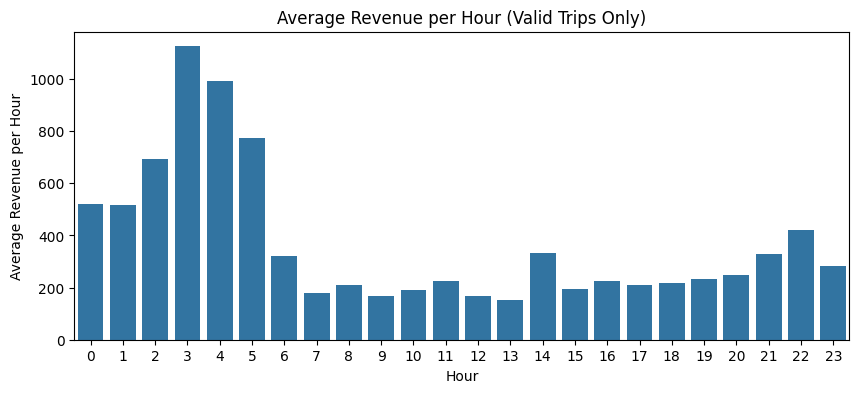

In [4071]:
# Plot pendapatan rata-rata per jam
plt.figure(figsize=(10,4))
sns.barplot(
    data=hourly,
    x='pickup_hour',
    y="avg_revenue_per_hour"
)
plt.title("Average Revenue per Hour (Valid Trips Only)")
plt.xlabel("Hour")
plt.ylabel("Average Revenue per Hour")
plt.show()

Jika dilihat dari pendapatan per jam rata-rata, dapat dilihat bahwa:
- Insight: **Pendapatan terbesar berada di dini hari (02.00-05.00)**
- Pendapatan per jam pada jam sibuk (07.00-20.00) relatif rendah
    - Insight: **Produktivitas pada jam sibuk relatif rendah**

dan jika dilihat dari proses pengolahan data untuk mendapatkan nilai pendapatan per jam rata-rata, dapat dilihat bahwa:
- Insight: **Sistem meter perusahaan sebaiknya melakukan proses validasi data pada data-data dengan durasi minimum**

# **4. Kesimpulan dan Rekomendasi** 


## Kesimpulan

1. Perbandingan antar jenis tarif
- Tarif yang paling sering digunakan pada perjalanan-perjalanan layanan antar-jemput New York City TLC merupakan tarif standard rate
- Tarif negotiated fare tidak konsisten serta tidak mengikuti pola "kenaikan jarak menyebabkan kenaikan tarif"
- Tarif "JFK" konsisten sama sepanjang jarak perjalanan, sehingga berpotensi tidak efisien terhadap jarak(underpricing/overpricing).
- Tarif "Newark" konsisten dan mengikuti pola "kenaikan jarak menyebabkan kenaikan tarif" dengan baik, kecuali pada perjalanan jarak pendek, yang kemungkinan dipengaruhi oleh kemacetan pada bandara.

2. Analisis jarak
- Jarak pendek
    - Tarif pada perjalanan jarak pendek tidak terlalu terpengaruhi oleh peningkatan jarak tempuh maupun durasi perjalanan. 
    - Tarif paling utama dipengaruhi oleh tarif minimum yang disediakan oleh New York City TLC.
    - Terdapat menyebabkan adanya data-data dengan durasi yang panjang pada data perjalanan jarak pendek.
    - Perjalanan-perjalanan jarak rendah yang terkena macet akan menyebabkan kerugian pada driver karena tarif yang tidak terpengaruhi durasi perjalanan.

- Jarak menengah
    - Perjalanan jarak menengah (3-10 mil) merupakan data dengan profitabilitas tertinggi.
    - Perjalanan jarak menengah (3-10 mil) merupakan rentang jarak paling ideal untuk pengaturan tarif, karena rata-rata tarif perjalanan jarak menengah relatif tinggi, sementara rata-rata tarif per mil perjalanan jarak menengah terlalu menurun.  

3. Analisis waktu
- Secara umum, tarif tidak meningkat bersamaan dengan peningkatan durasi perjalanan, sehingga perjalanan panjang serta keadaan macet dapat merugikan driver.
- Diperlukan tarif waktu minimum sebagai kompensasi tarif ketika jalanan sedang macet, dimana tarif untuk durasi 5 menit merupakan tarif yang ideal untuk dijadikan tarif waktu minimum.
- Pendapatan terbesar yang dihasilkan oleh transaksi layanan antar-jemput berada di dini hari (02.00-05.00).
- Pendapatan per jam pada jam sibuk (07.00-20.00) relatif rendah. 

## Rekomendasi

1. Pikirkan hal berikut ketika mengatur tarif:
- Gunakan data-data perjalanan-perjalanan jarak menengah (3-10 mil) sebagai benchmark ketika mengoptimasi tarif.
- Prioritaskan tarif standard rate ketika mengoptimasi tarif dibandingkan dengan tipe tarif lainnya.
- Hindari kenaikan tarif per mile secara rata.

2. Implementasikan tarif minimum berbasis waktu setara 5 menit waktu perjalanan untuk mengatasi kondisi macet.

3. Tetapkan pengaturan biaya/tarif berbasis waktu mulai perjalanan.
- Dilakukan agar pendapatan tidak terpengaruh oleh produktivitas rendah pada jam padat.

4. Lakukan validasi durasi perjalanan pada taksimeter 
- Dilakukan untuk menghindari adanya data perjalanan berdurasi 0.